In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/gm2offline_ana_100files_fullTrees.root")
#f = r.TFile("./data/dataExternal/Oct16DataSet/gm2offline_ana_12396057_16369.00196.root")
f = r.TFile("./data/gm2offline_ana.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [3]:
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana.root	
 TFile*		./data/gm2offline_ana.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffddf09d90
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7fffddf23560
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7fffddfbf240
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7fffd86c2470
   OBJ: TTree	wveTree	wveTree : 0 at: 0x7fffddf22e90
   OBJ: TTree	wveNoPartnerTree	wveNoPartnerTree : 0 at: 0x7fffddfc20f0
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7
   KEY: TDirectoryFile	evw_calo8;1	evw_calo8
   KEY: TDirectoryFile	evw_calo9;1	evw_calo9
   KEY: TDirectoryFile	evw_calo10;1	evw_calo10
   KEY: TDirectoryFile	evw_calo11;1	evw_calo

In [4]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :    50883 : Total =        13271452 bytes  File  Size =    5654659 *
*        :          : Tree compression factor =   2.35                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    50883 : Total  Size=     204553 bytes  File Size  =       1787 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 114.19     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    50883 : Total  Size=     204586 bytes  File Size  =       1801 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 113.32     *
*...................................................

---

Lets first look at the comparison plots

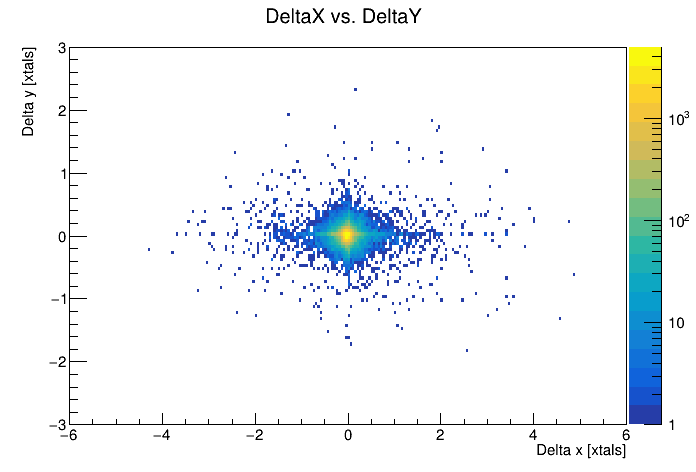

In [6]:
c2 = r.TCanvas()
hdeltaxy = f.Get("farline").Get("evwDeltaXDeltaY").Clone()
hdeltaxy.Draw("COLZ")
hdeltaxy.Rebin2D(5,5)
hdeltaxy.GetXaxis().SetRangeUser(-6,6)
hdeltaxy.GetYaxis().SetRangeUser(-3,3)
c2.SetLogz()
c2.Draw()

Info in <TCanvas::SaveAs>: ROOT file ./c3.root has been created


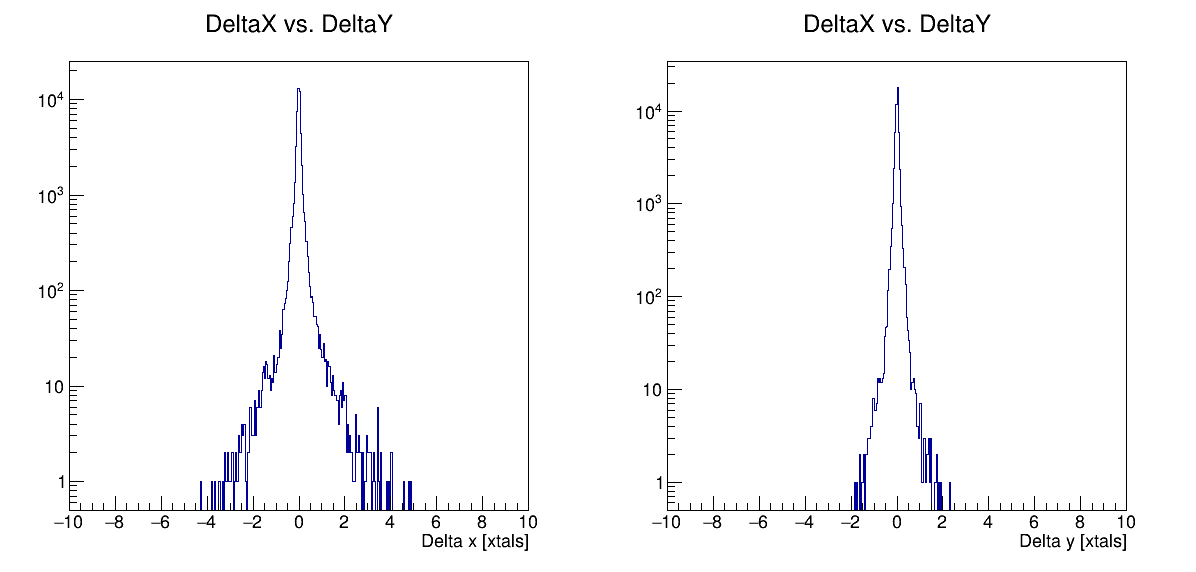

In [7]:
hdeltaxy.GetXaxis().SetRangeUser(-10,10)
hdeltaxy.GetYaxis().SetRangeUser(-10,10)

c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax = hdeltaxy.ProjectionX().Clone()
hdeltax.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay = hdeltaxy.ProjectionY().Clone()
hdeltay.Draw()

c3.Draw()
c3.Print("./c3.root")

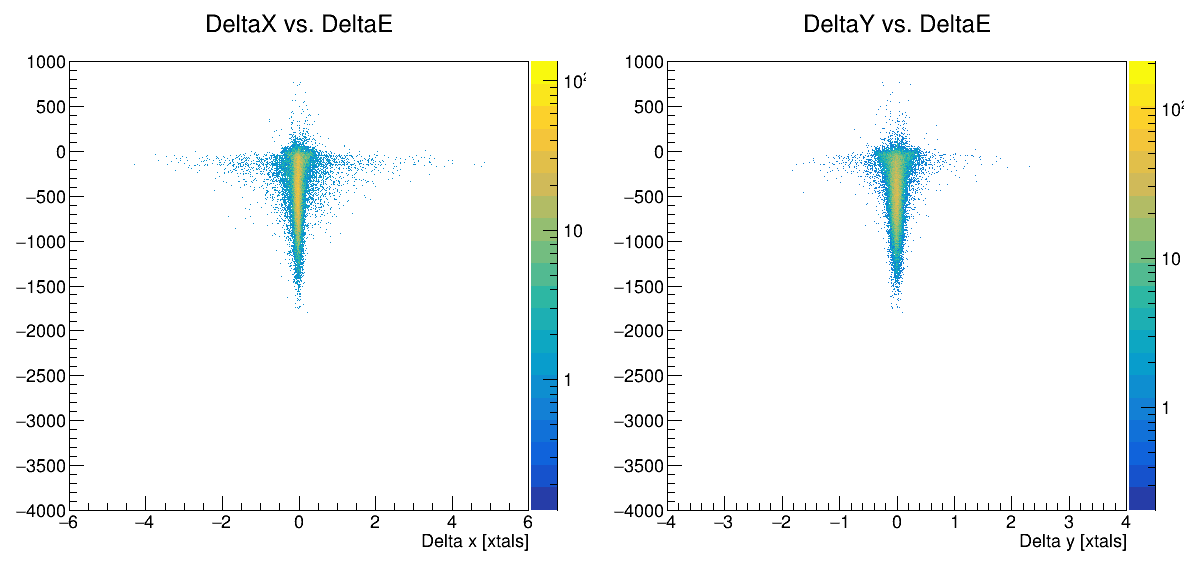

In [8]:
c2 = r.TCanvas("c2","c2",1200,600)
c2.Divide(2)
c2.cd(1)
evwDeltaXDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone()
evwDeltaXDeltaE.Draw("colz")
#evwDeltaXDeltaE.Rebin2D(5,5)
evwDeltaXDeltaE.GetXaxis().SetRangeUser(-6,6)
evwDeltaXDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.cd(2)
evwDeltaYDeltaE = f.Get("farline").Get("evwDeltaYDeltaE").Clone()
evwDeltaYDeltaE.Draw("colz")
#evwDeltaYDeltaE.Rebin2D(5,5)
evwDeltaYDeltaE.GetXaxis().SetRangeUser(-4,4)
evwDeltaYDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.Draw()

---

We can also look at these plot with an energy cut of various levels, to see if the outliers are primarily in the low energy regime

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


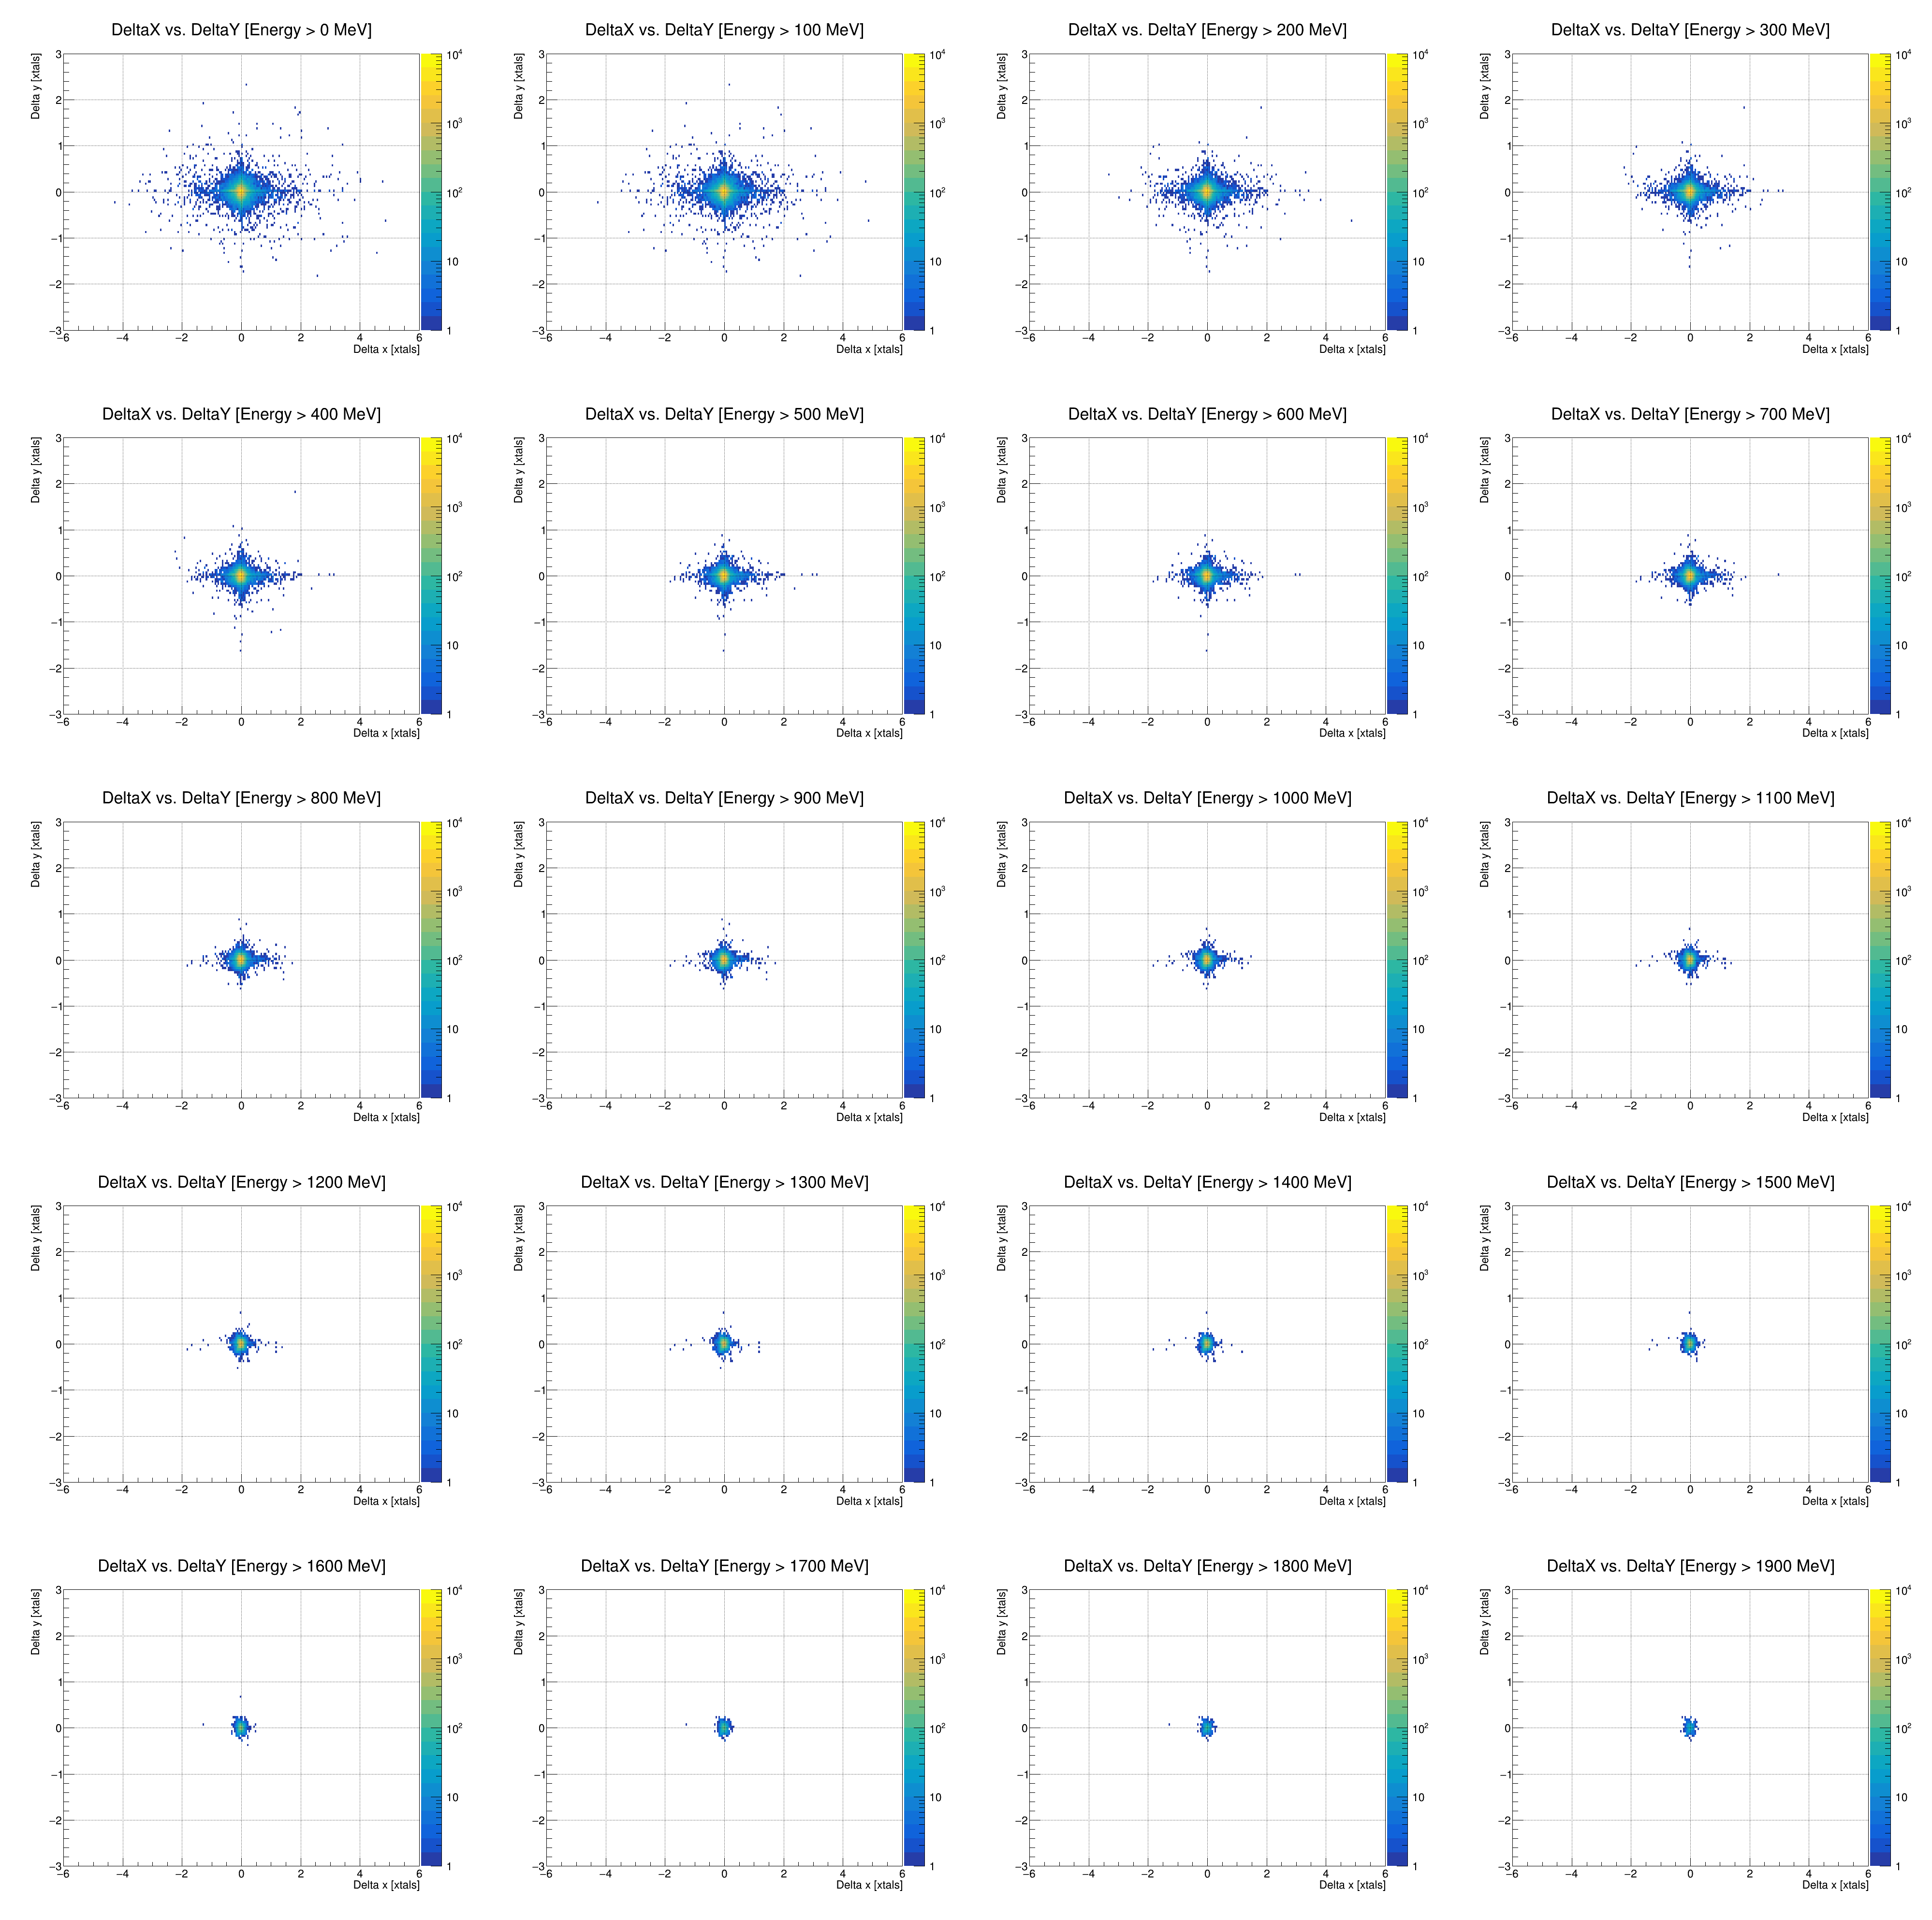

In [9]:
energycutVec = []
for energycut in range(0,2000,100):
    hcompxy_ecut = hdeltaxy.Clone("hcompxy_ecut")
    hcompxy_ecut.Reset()
    tcomp.Draw("deltaY:deltaX>>hcompxy_ecut","energyWest > "+str(energycut)+" && energyEast > "+str(energycut),"goff")
    hcompxy_ecut.Draw("colz")

    hcompxy_ecut.SetTitle("DeltaX vs. DeltaY [Energy > "+str(energycut)+" MeV]")
    hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
    hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)
    hcompxy_ecut.GetZaxis().SetRangeUser(1,10000)
               
    energycutVec.append( hcompxy_ecut.Clone(str(energycut)) )
               
               
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(4,5)
for i, hi in enumerate(energycutVec):
    c2.cd(i+1)
    r.gPad.SetLogz()
    r.gPad.SetGridx()
    r.gPad.SetGridy()
    hi.Draw("colz")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file ./c3.root has been created


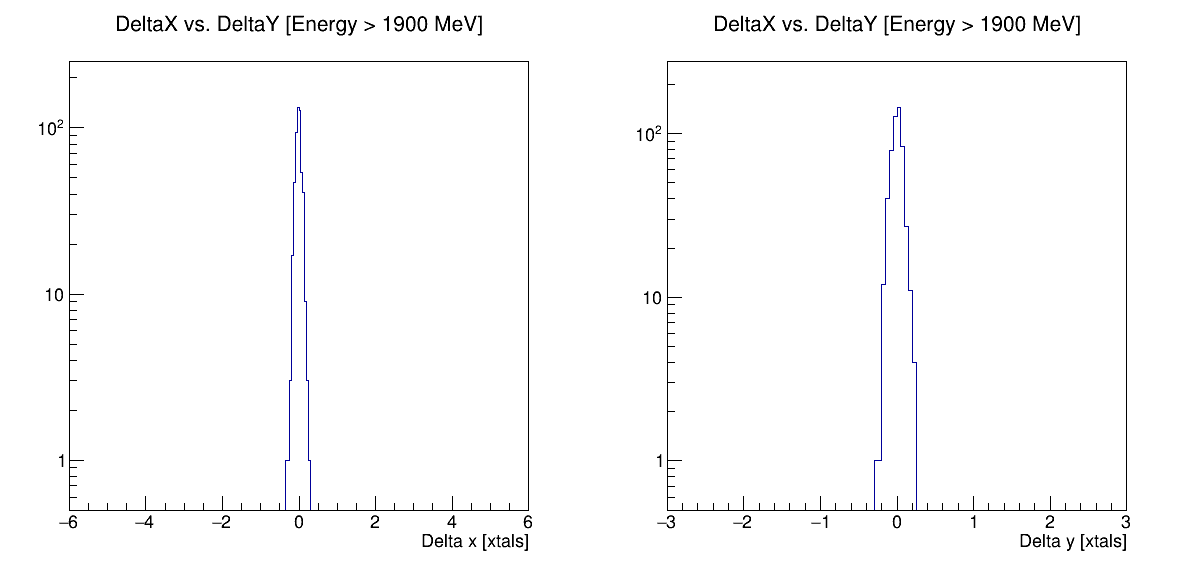

In [10]:
c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax_ecut = hcompxy_ecut.ProjectionX().Clone()
hdeltax_ecut.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay_ecut = hcompxy_ecut.ProjectionY().Clone()
hdeltay_ecut.Draw()

c3.Draw()
c3.Print("./c3.root")

---

Similarly, we can look at the events which were cut out by this cut

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


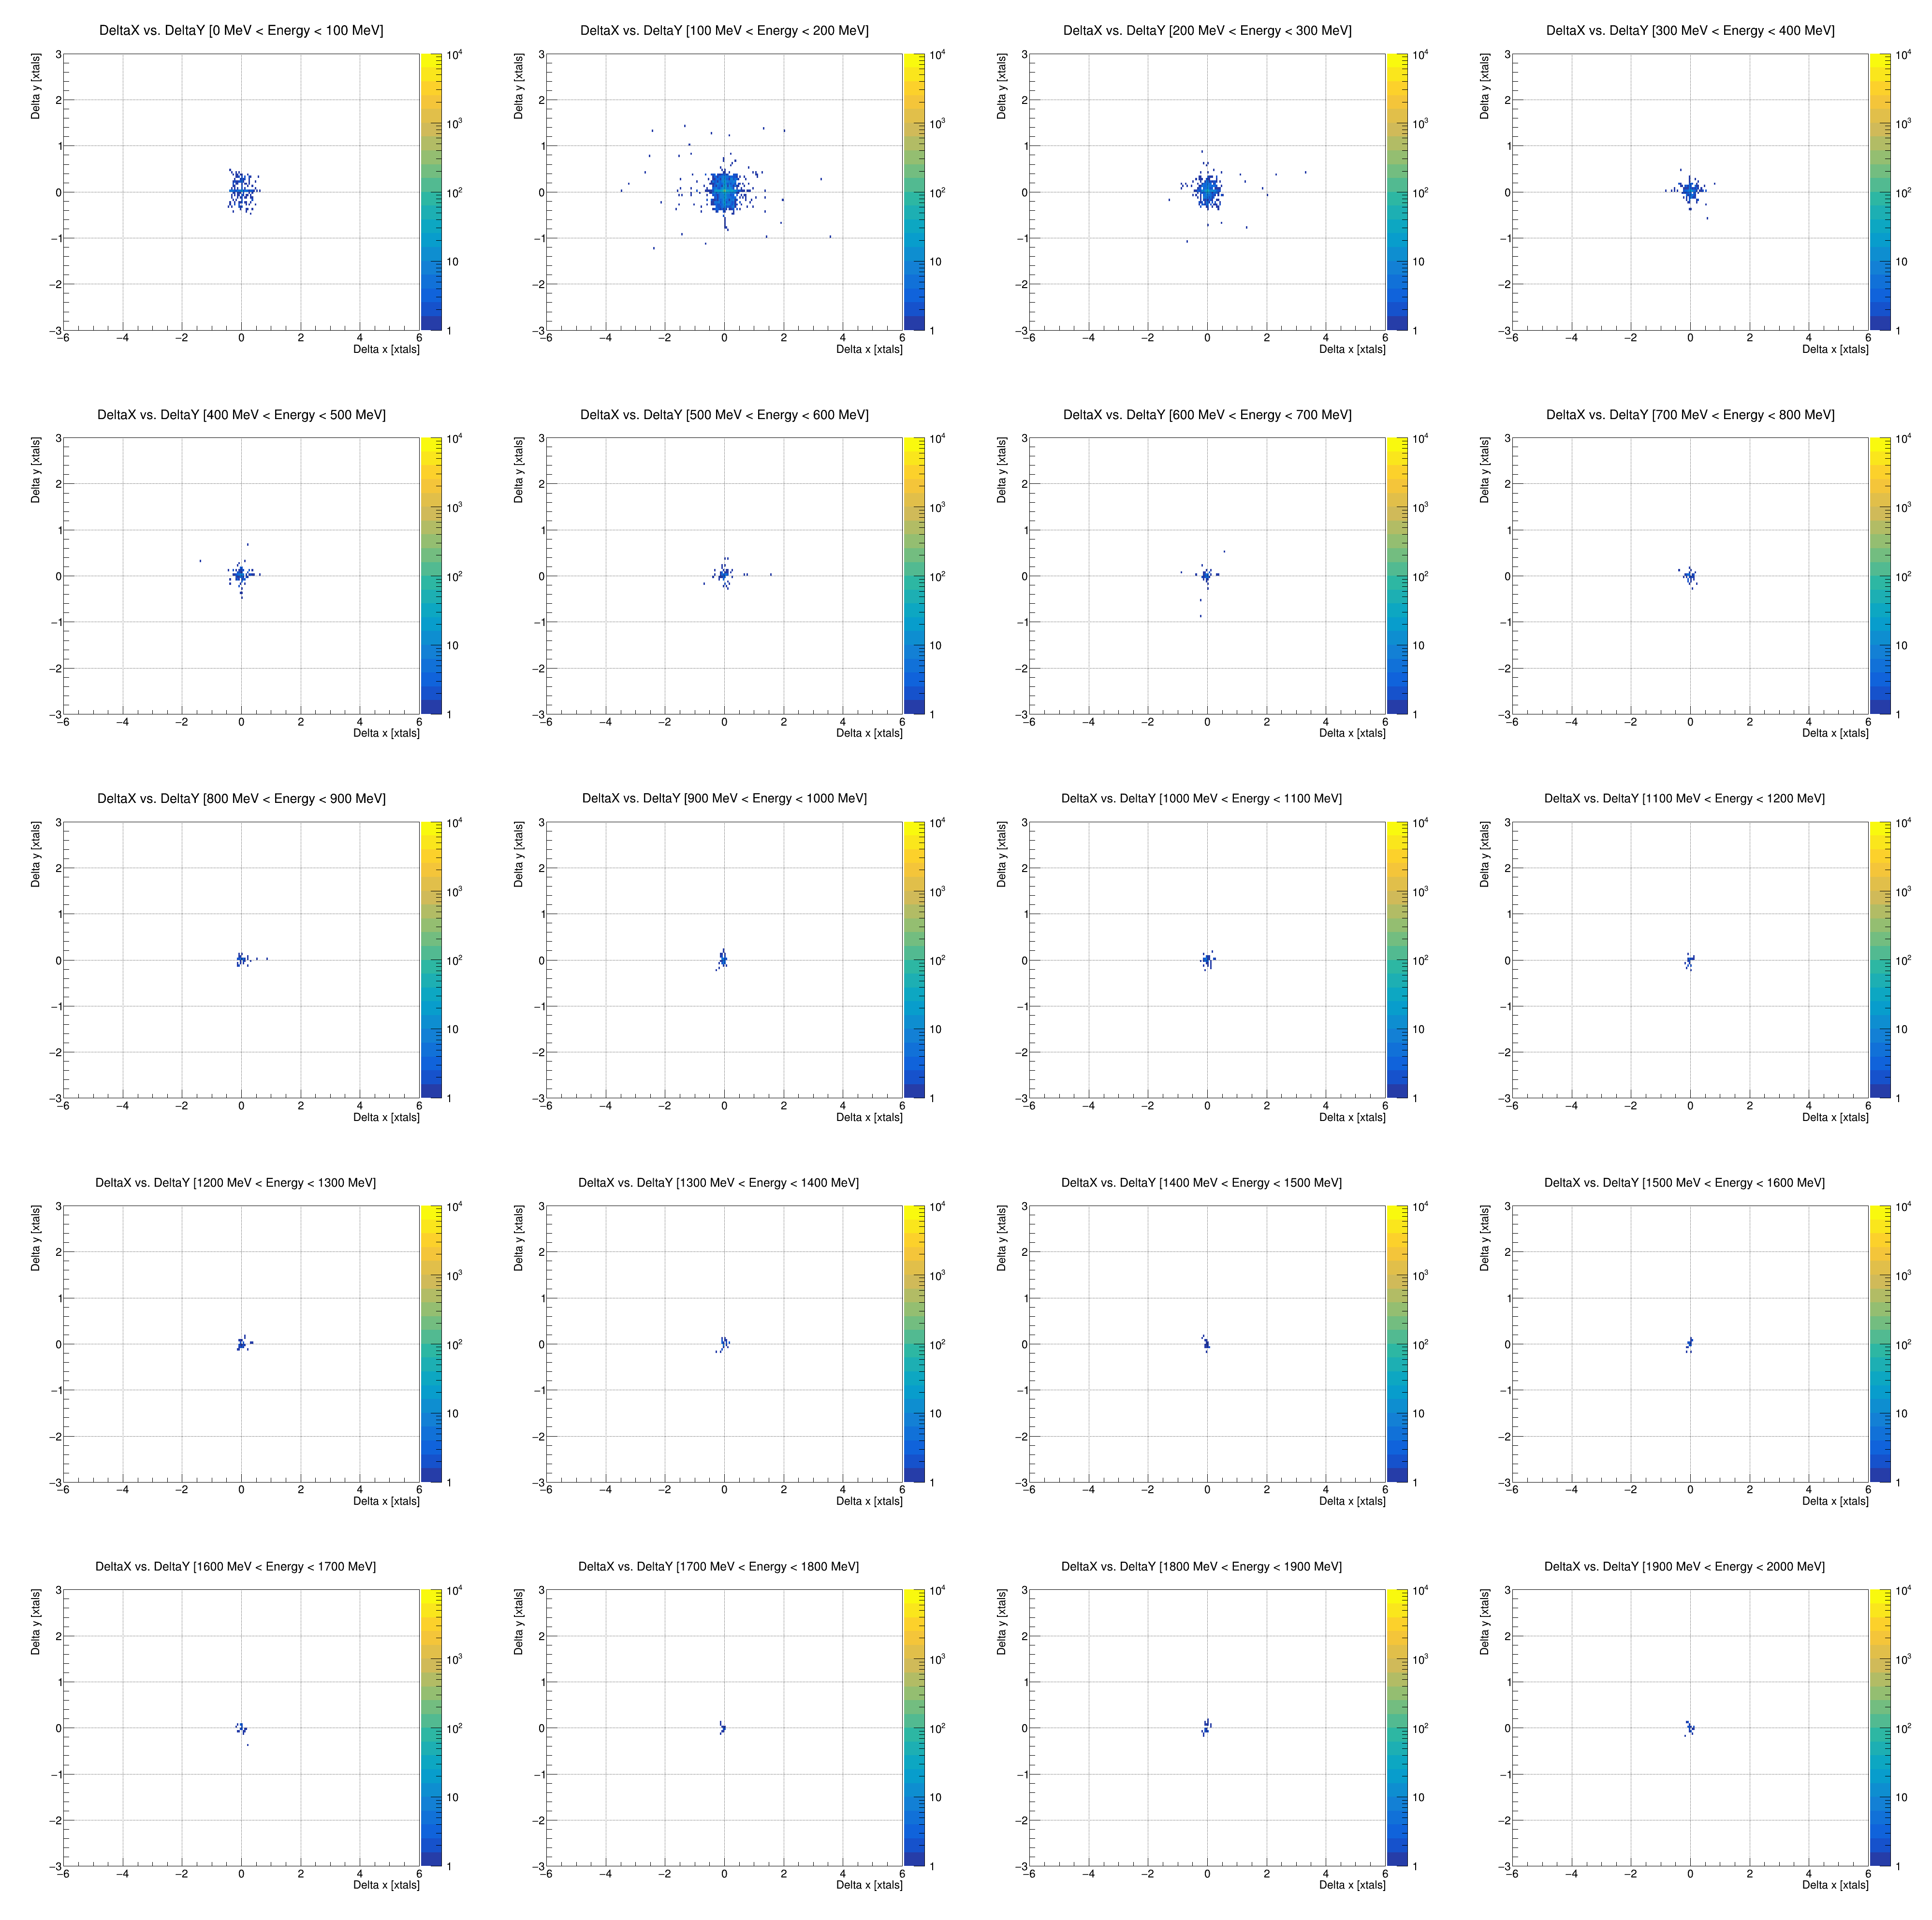

In [11]:
energycutVec = []
for energycut in range(0,2000,100):
    hcompxy_ecut = hdeltaxy.Clone("hcompxy_ecut")
    hcompxy_ecut.Reset()
    tcomp.Draw("deltaY:deltaX>>hcompxy_ecut","energyWest > " + str(energycut) + " && energyEast > " + str(energycut) +
               " && energyWest < " + str(energycut+100) + " && energyEast < " + str(energycut+100),"goff")
    hcompxy_ecut.Draw("colz")

    hcompxy_ecut.SetTitle("DeltaX vs. DeltaY ["+str(energycut)+" MeV < Energy < "+str(energycut + 100)+" MeV]")
    hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
    hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)
    hcompxy_ecut.GetZaxis().SetRangeUser(1,10000)
               
    energycutVec.append( hcompxy_ecut.Clone(str(energycut)) )
               
               
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(4,5)
for i, hi in enumerate(energycutVec):
    c2.cd(i+1)
    r.gPad.SetLogz()
    r.gPad.SetGridx()
    r.gPad.SetGridy()
    hi.Draw("colz")
c2.Draw()

---

Now I wonder what this distribution looks like for those cluster pairs which have a large deltaE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


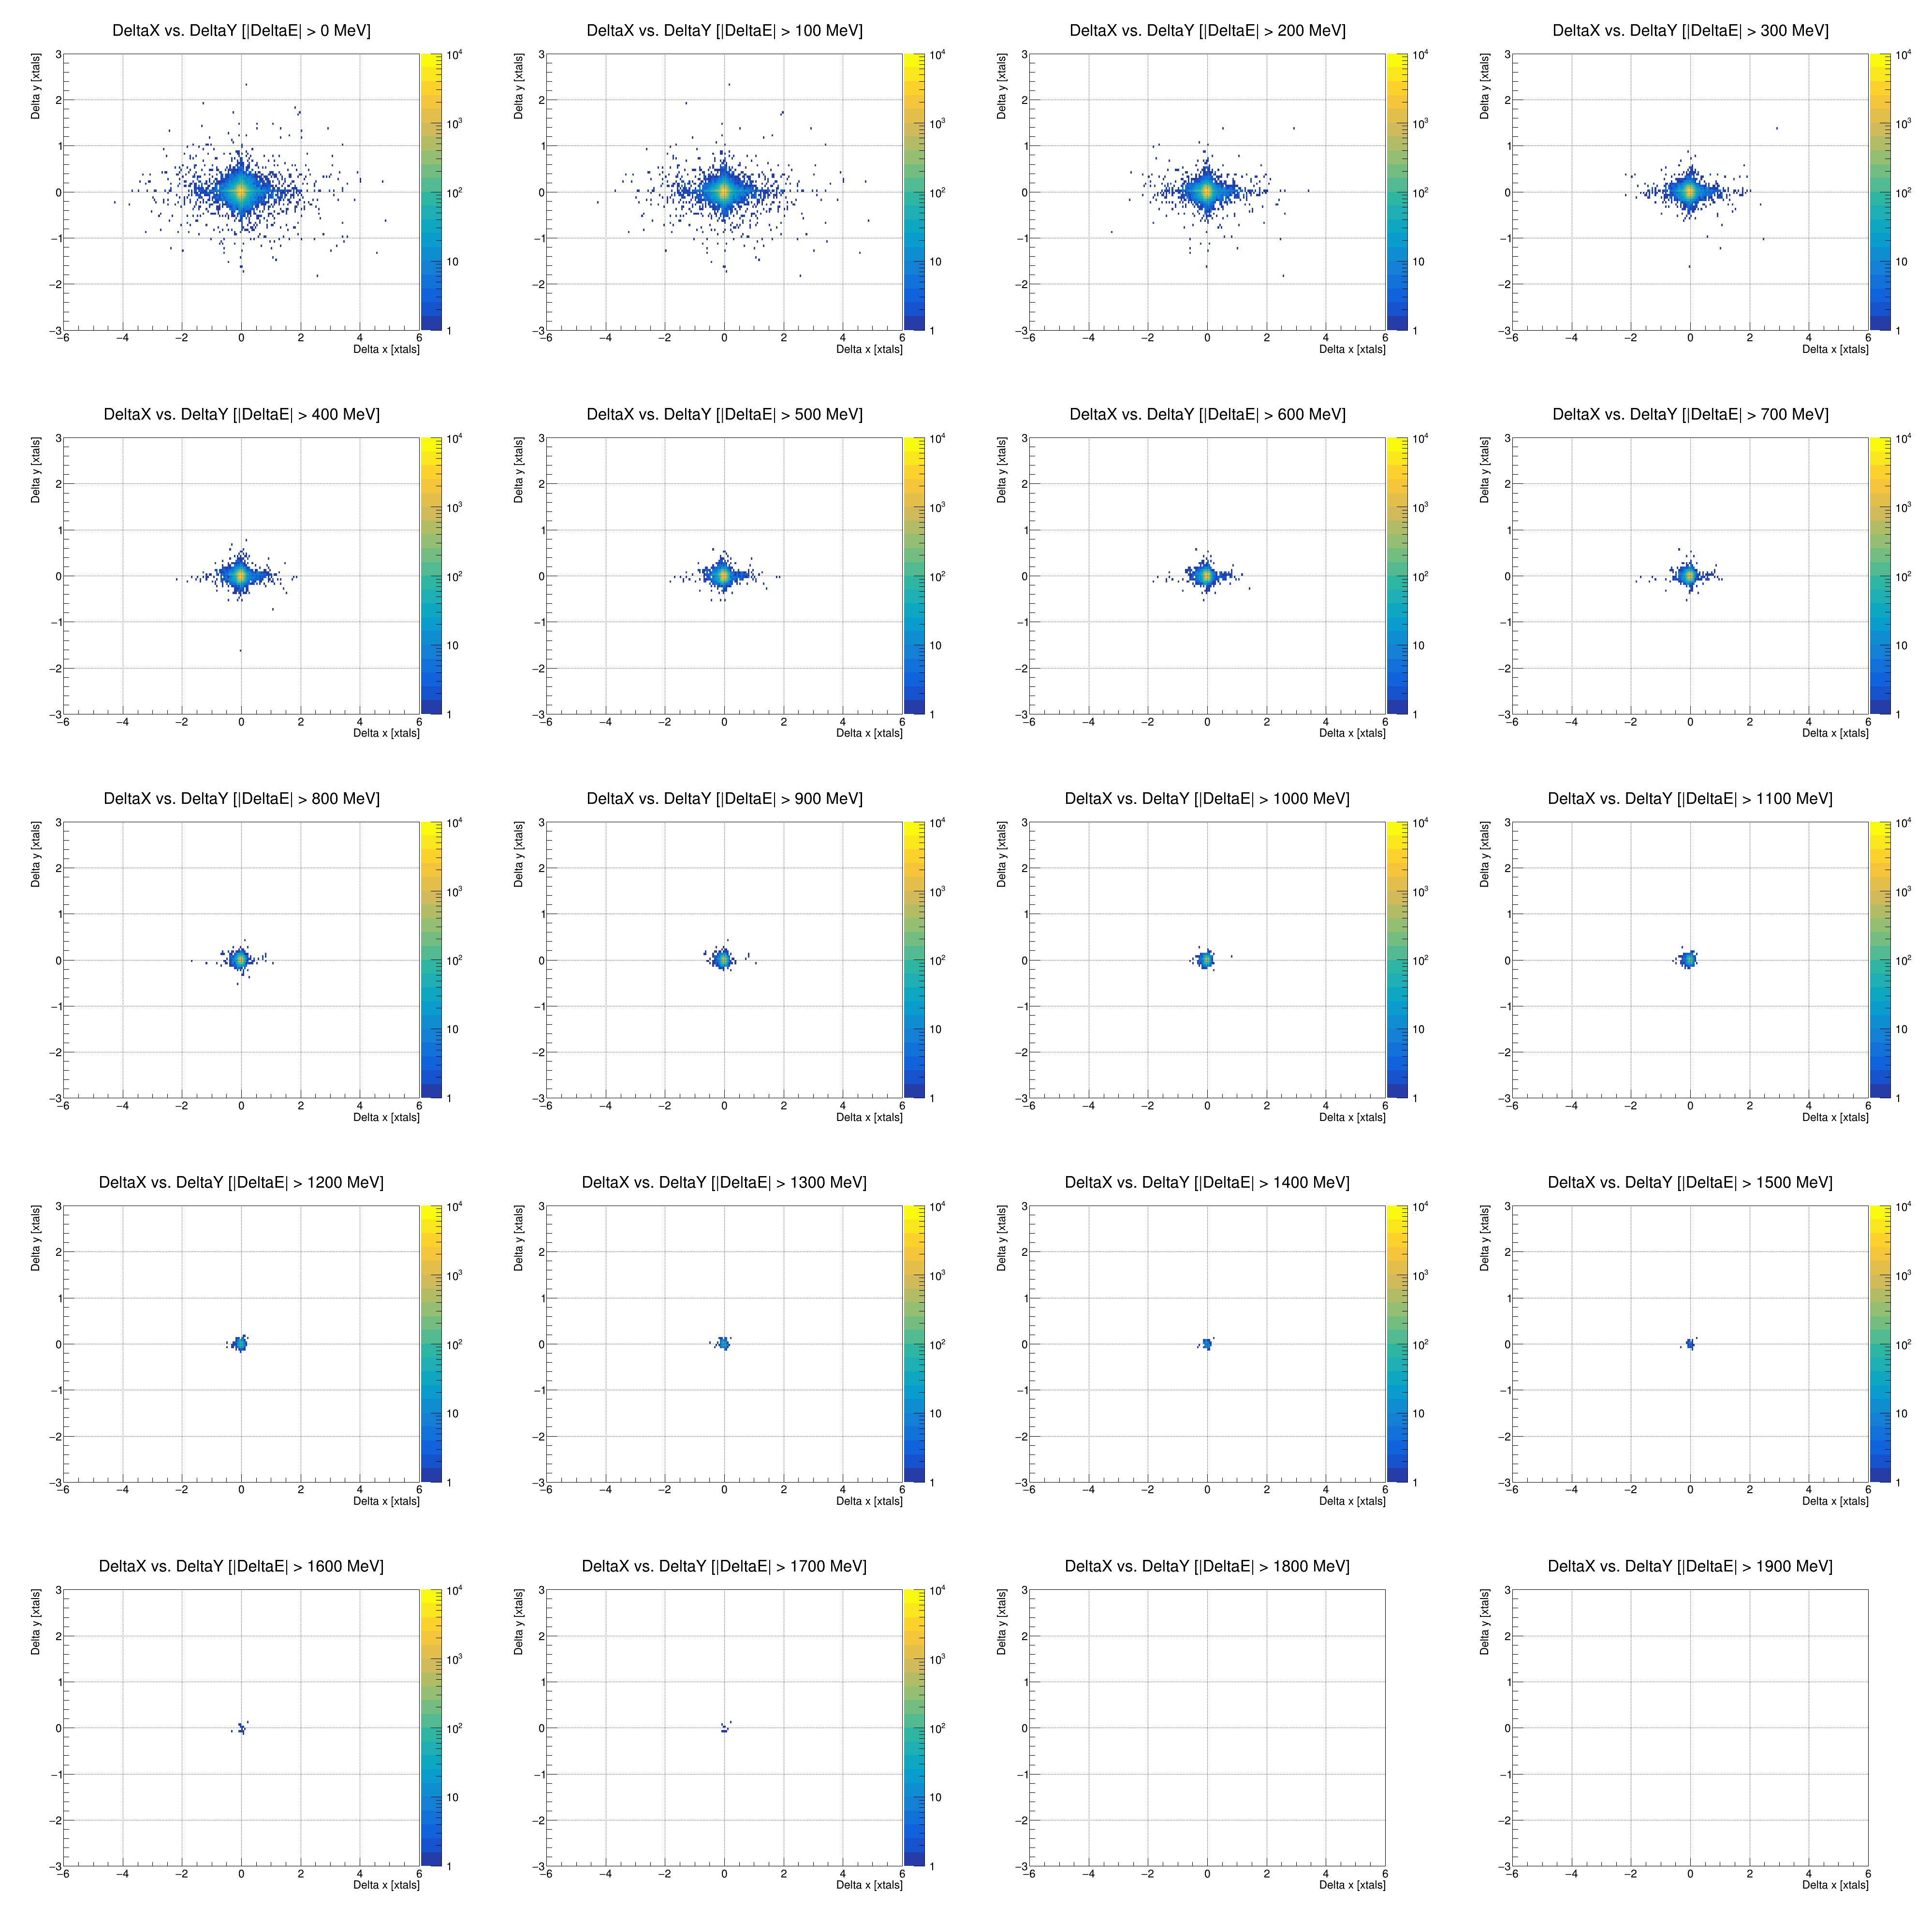

In [12]:
energycutVec = []
for energycut in range(0,2000,100):
    hcompxy_ecut = hdeltaxy.Clone("hcompxy_ecut")
    hcompxy_ecut.Reset()
    tcomp.Draw("deltaY:deltaX>>hcompxy_ecut","TMath::Abs(deltaE) >"+str(energycut) ,"goff")
    hcompxy_ecut.Draw("colz")

    hcompxy_ecut.SetTitle("DeltaX vs. DeltaY [|DeltaE| > "+str(energycut)+" MeV]")
    hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
    hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)
    hcompxy_ecut.GetZaxis().SetRangeUser(1,10000)
               
    energycutVec.append( hcompxy_ecut.Clone(str(energycut)) )
               
               
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(4,5)
for i, hi in enumerate(energycutVec):
    c2.cd(i+1)
    r.gPad.SetLogz()
    r.gPad.SetGridx()
    r.gPad.SetGridy()
    hi.Draw("colz")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


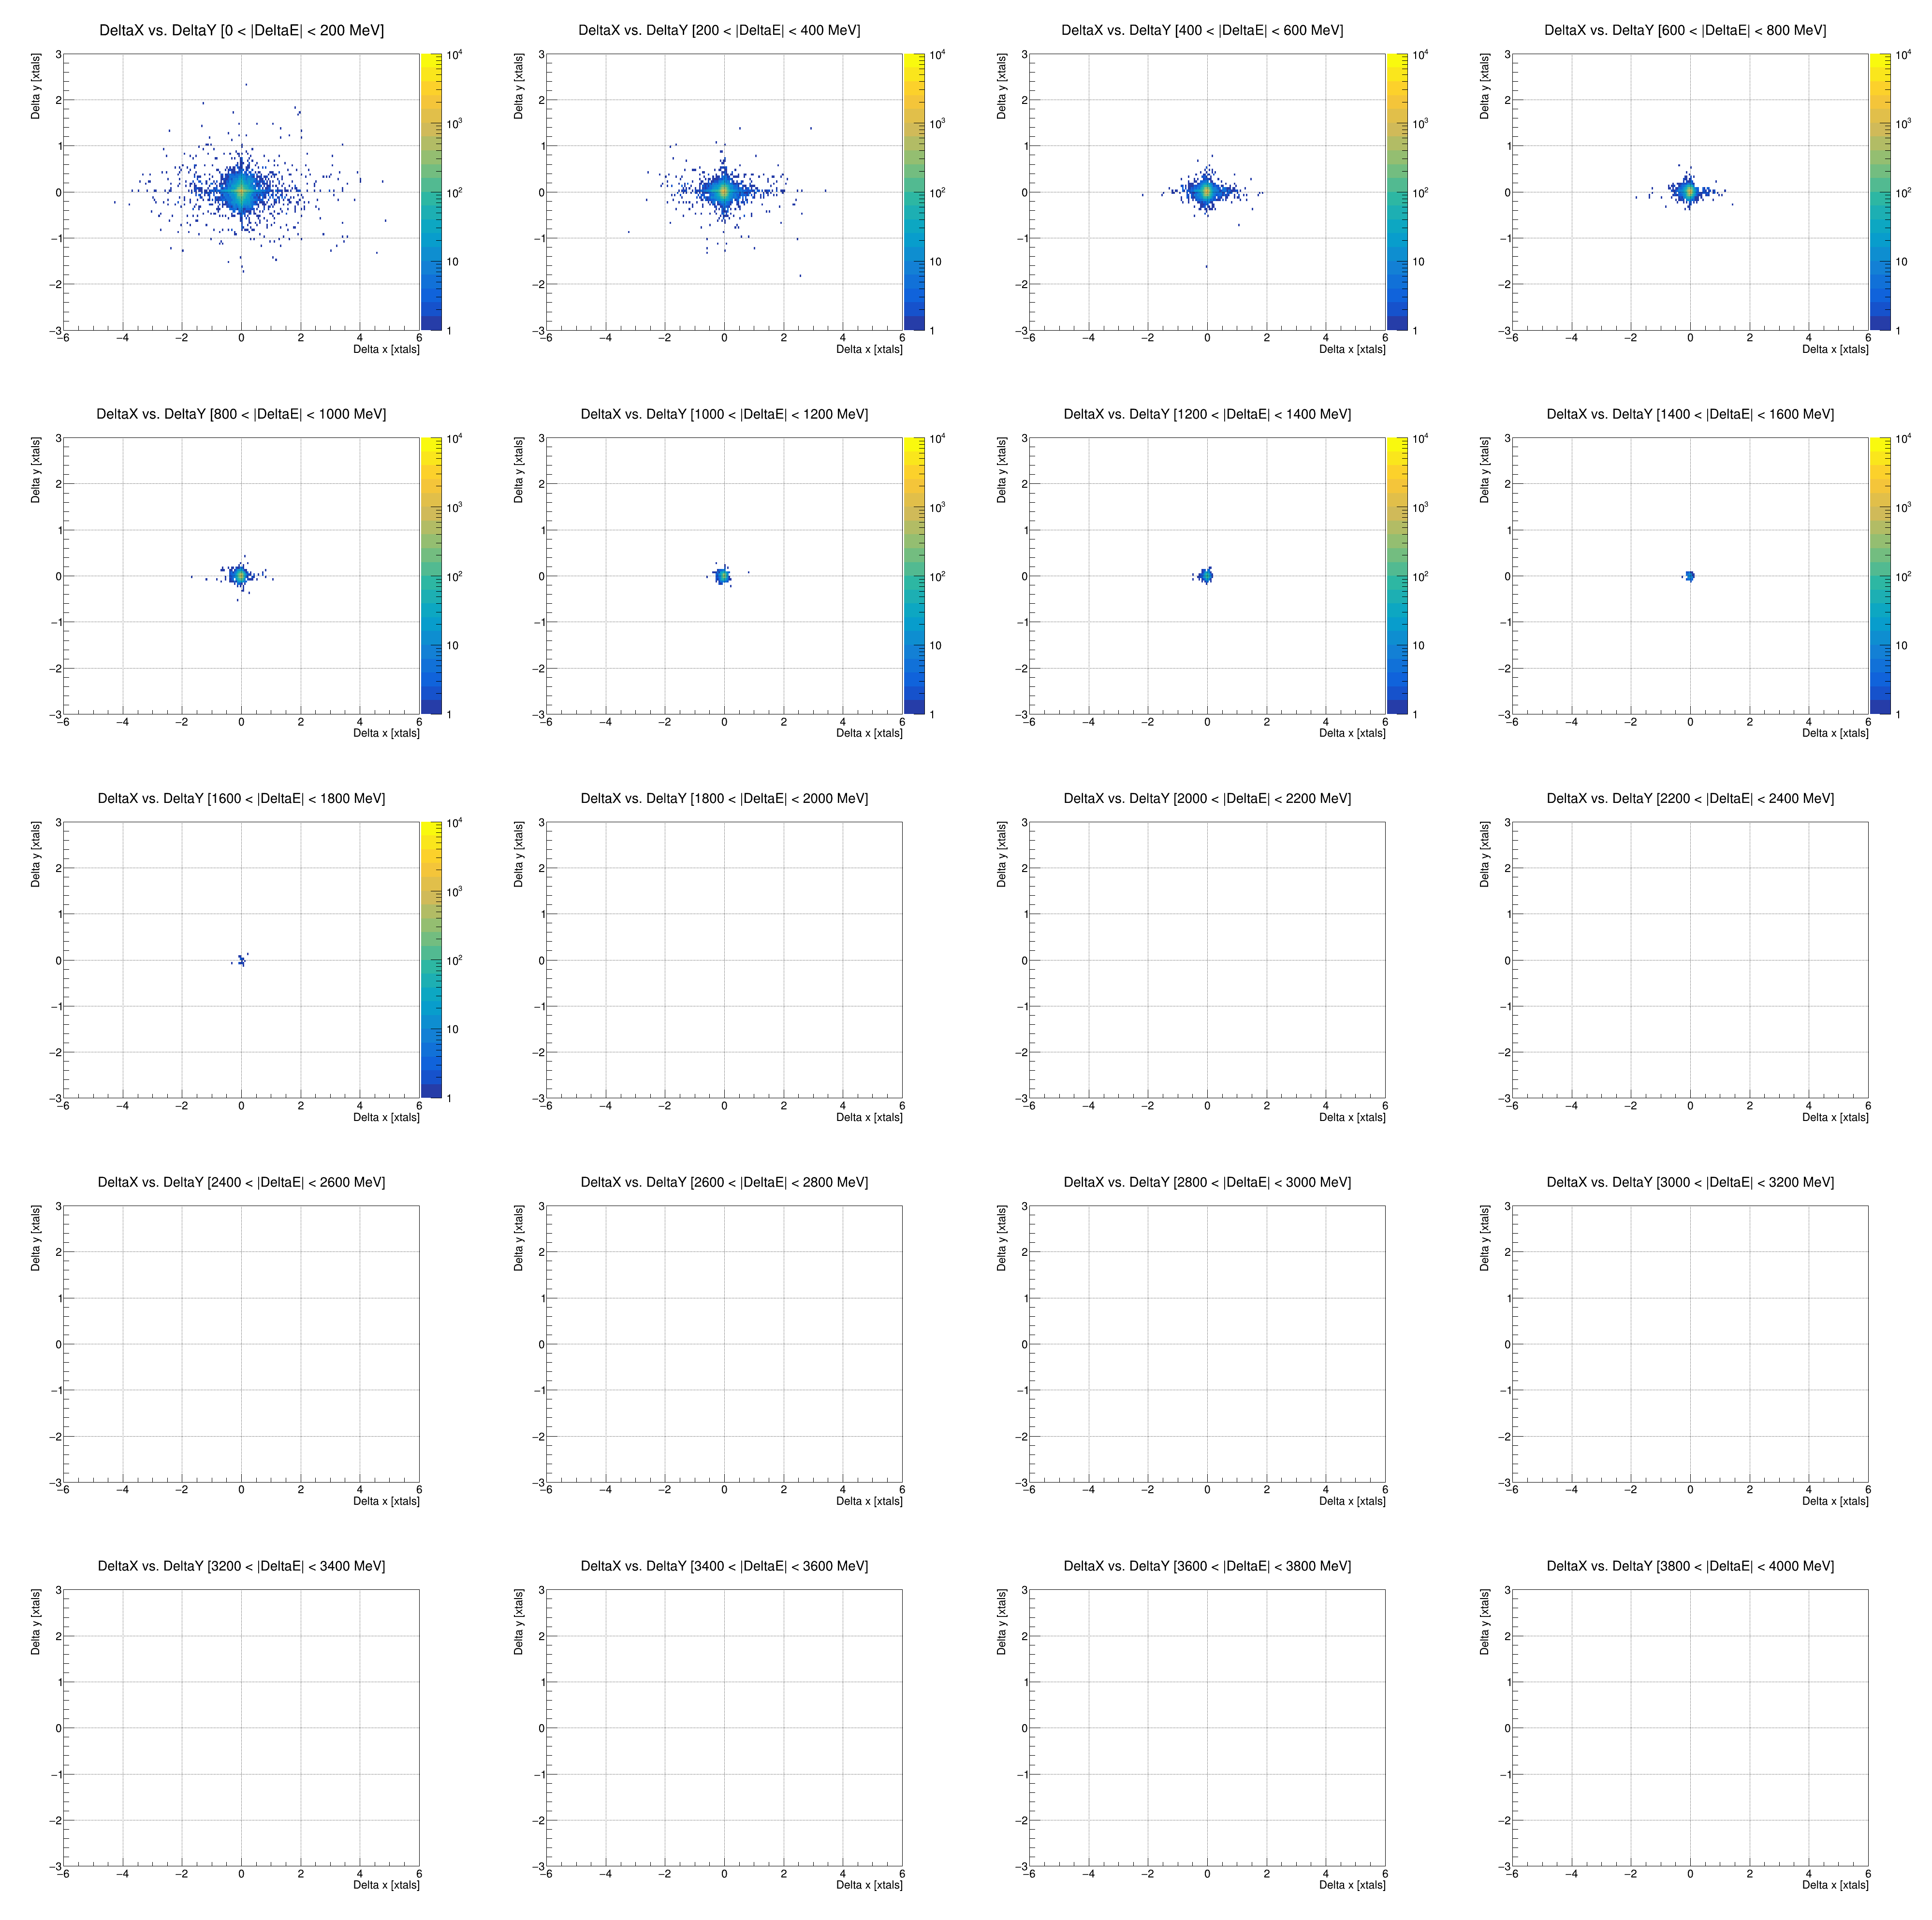

In [13]:
energycutVec = []
for energycut in range(0,4000,200):
    hcompxy_ecut = hdeltaxy.Clone("hcompxy_ecut")
    hcompxy_ecut.Reset()
    tcomp.Draw("deltaY:deltaX>>hcompxy_ecut","TMath::Abs(deltaE) > "+str(energycut)+
               " && TMath::Abs(deltaE) < "+str(energycut + 200),"goff")
    hcompxy_ecut.Draw("colz")

    hcompxy_ecut.SetTitle("DeltaX vs. DeltaY ["+str(energycut)+" < |DeltaE| < "+str(energycut + 200)+" MeV]")
    hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
    hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)
    hcompxy_ecut.GetZaxis().SetRangeUser(1,10000)
               
    energycutVec.append( hcompxy_ecut.Clone(str(energycut)) )
               
               
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(4,5)
for i, hi in enumerate(energycutVec):
    c2.cd(i+1)
    r.gPad.SetLogz()
    r.gPad.SetGridx()
    r.gPad.SetGridy()
    hi.Draw("colz")
c2.Draw()

Starting Calo: 1
   Crystal:  0
   Crystal:  1
   Crystal:  2
   Crystal:  3
   Crystal:  4
   Crystal:  5
   Crystal:  6
   Crystal:  7
   Crystal:  8
   Crystal:  9
   Crystal:  10
   Crystal:  11
   Crystal:  12
   Crystal:  13
   Crystal:  14
   Crystal:  15
   Crystal:  16
   Crystal:  17
   Crystal:  18
   Crystal:  19
   Crystal:  20
   Crystal:  21
   Crystal:  22
   Crystal:  23
   Crystal:  24
   Crystal:  25
   Crystal:  26
   Crystal:  27
   Crystal:  28
   Crystal:  29
   Crystal:  30
   Crystal:  31
   Crystal:  32
   Crystal:  33
   Crystal:  34
   Crystal:  35
   Crystal:  36
   Crystal:  37
   Crystal:  38
   Crystal:  39
   Crystal:  40
   Crystal:  41
   Crystal:  42
   Crystal:  43
   Crystal:  44
   Crystal:  45
   Crystal:  46
   Crystal:  47
   Crystal:  48
   Crystal:  49
   Crystal:  50
   Crystal:  51
   Crystal:  52
   Crystal:  53
Starting Calo: 2
   Crystal:  0
   Crystal:  1
   Crystal:  2
   Crystal:  3
   Crystal:  4
   Crystal:  5
   Crystal:  6
   Crys

Error in <TTreeFormula::Compile>:  Bad numerical expression : "crystals"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {deltaT-timeCorr,caloNum == 1 && crystals == 0 && deltaT-timeCorr < -3}
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crystals"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {deltaT-timeCorr,caloNum == 1 && crystals == 1 && deltaT-timeCorr < -3}
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crystals"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {deltaT-timeCorr,caloNum == 1 && crystals == 2 && deltaT-timeCorr < -3}
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Error in <TTreeFormula::Compile>:  Bad numerical expression : "crystals"
Info in <TSelectorDra

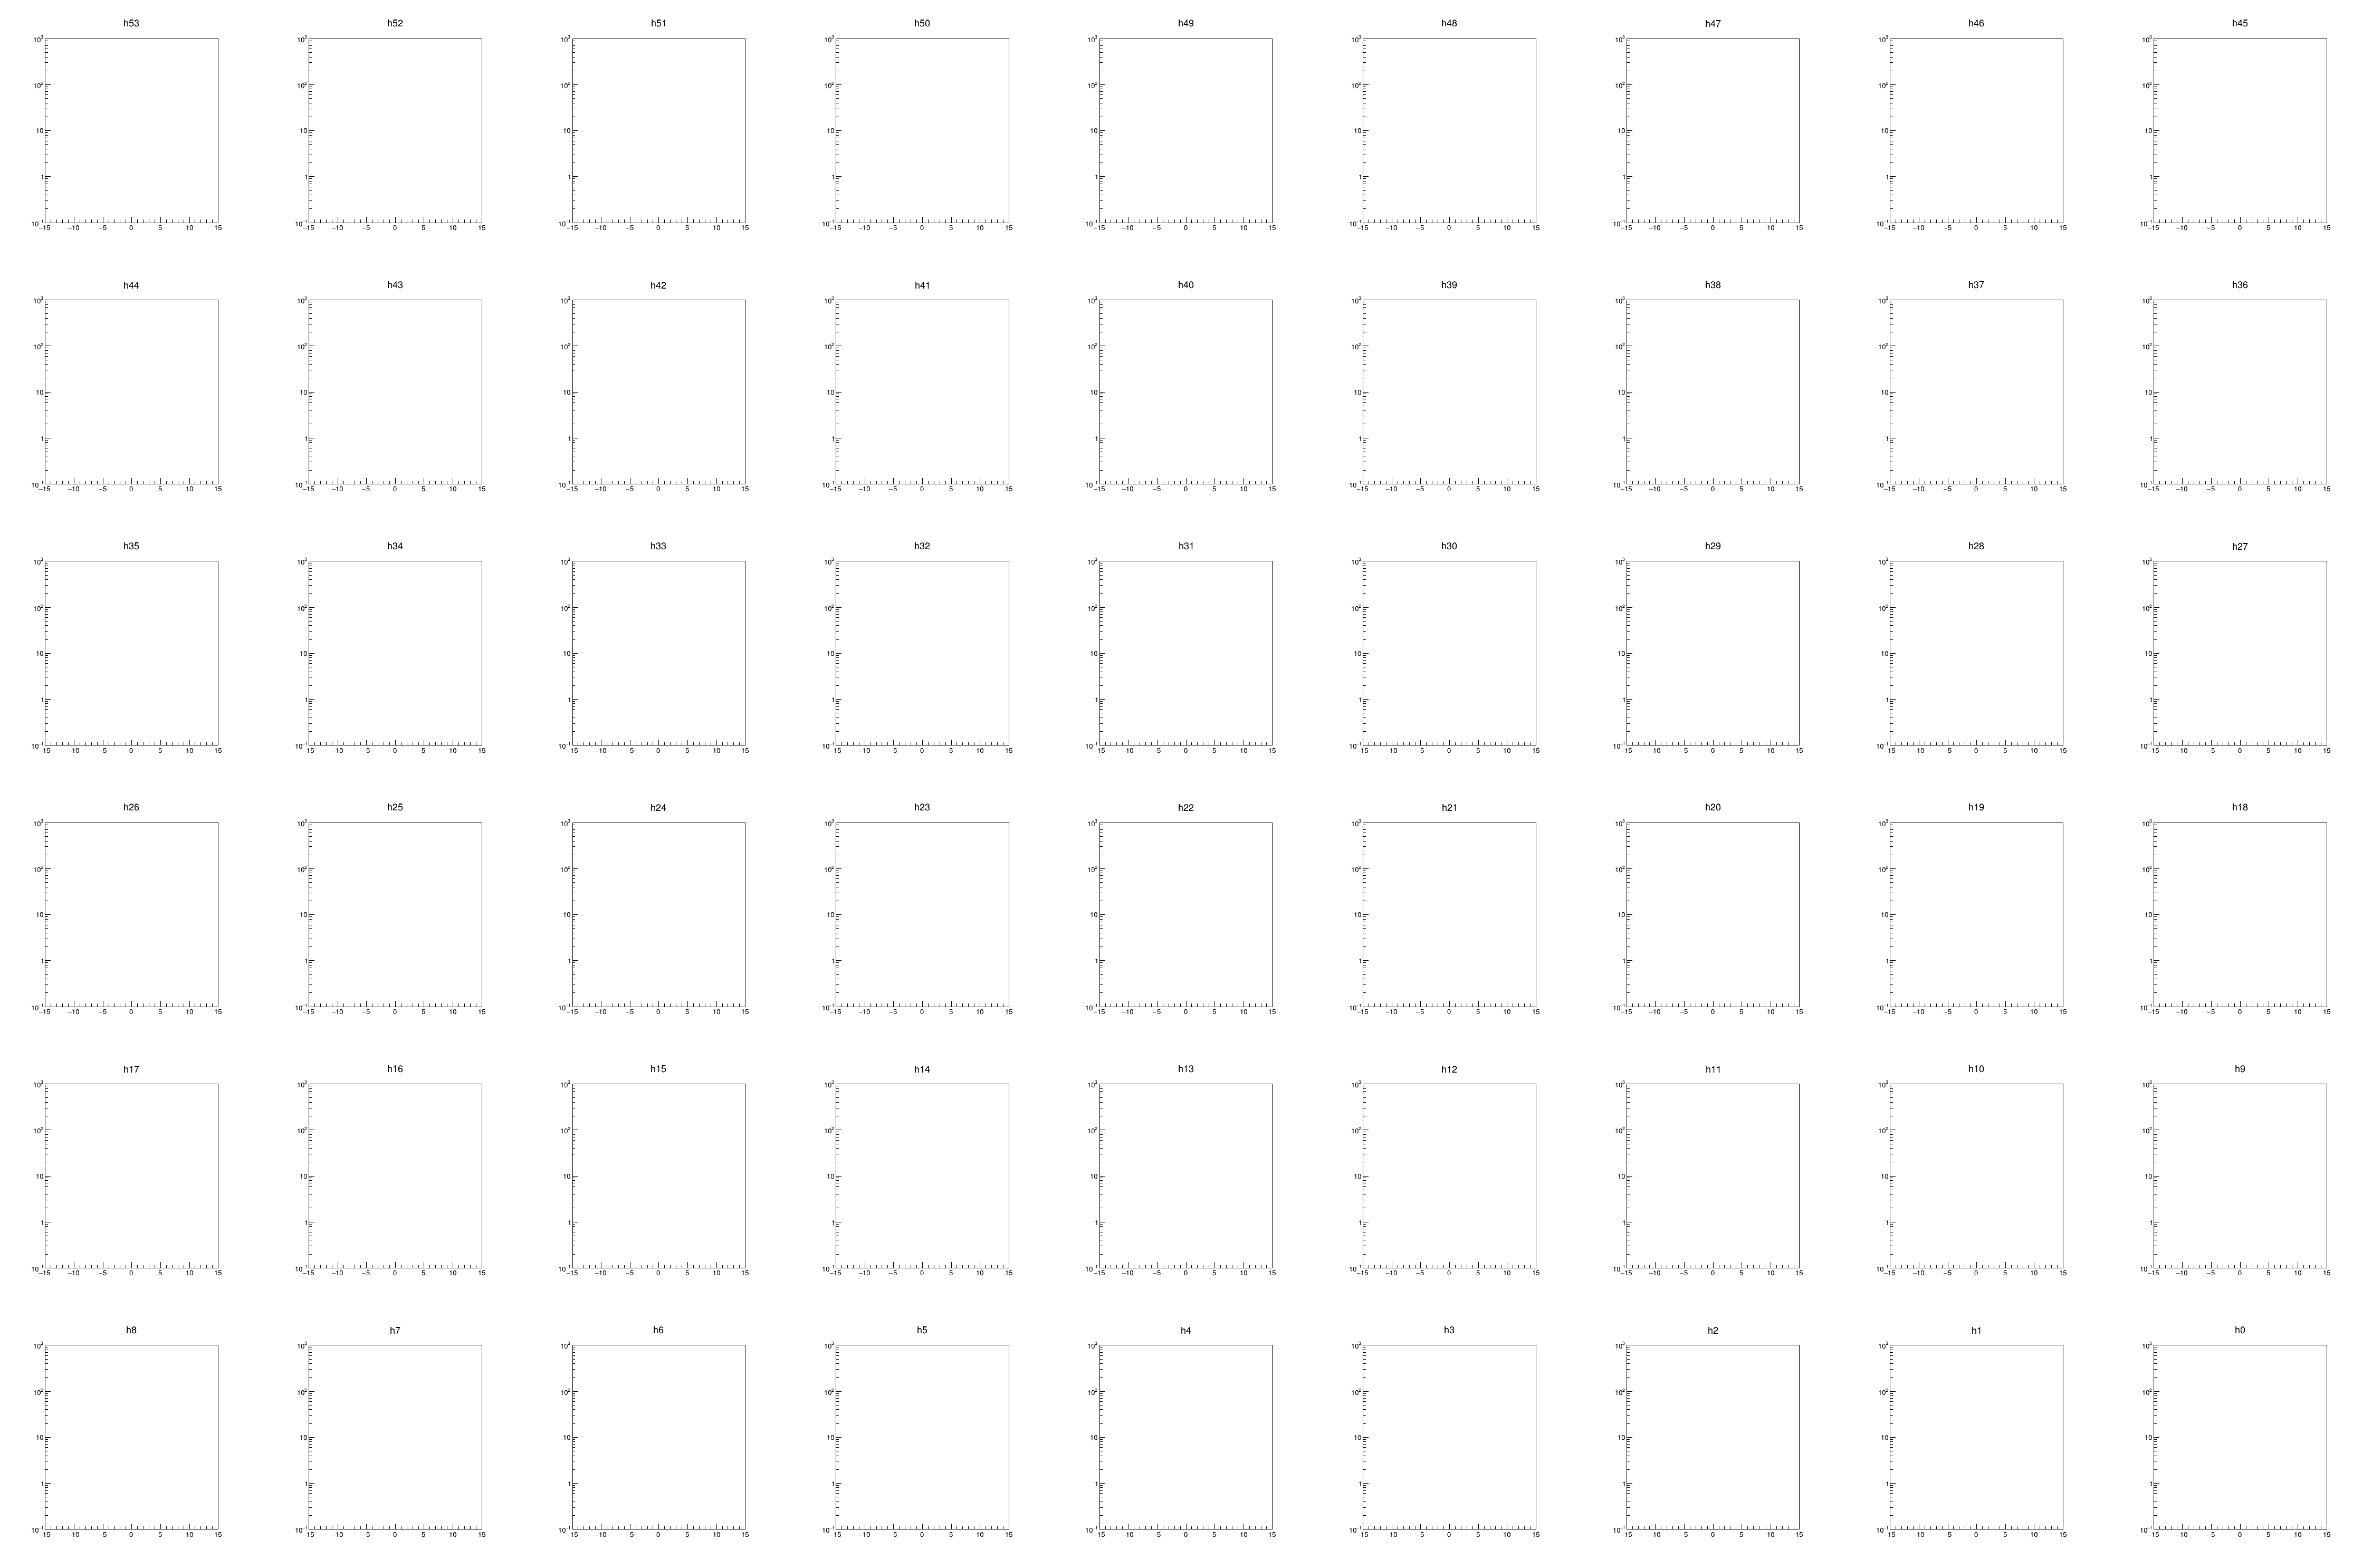

In [14]:
for caloNum in range(1,25):
    print("Starting Calo:", caloNum)
    c = r.TCanvas("c","c",4500,3000)
    c.Divide(9,6)
    crystalVec = []
    for crystal in range(54):
        hi = r.TH1D("hi","h"+str(crystal),300,-15,15)
        tcomp.Draw("deltaT-timeCorr>>hi",
                   "caloNum == "+str(caloNum)
                   +" && crystals == "+str(crystal)
                   +" && deltaT-timeCorr < -3","goff")
        crystalVec.append(hi.Clone("h"+str(crystal)))
        print("   Crystal: ", crystal)

    for i,hi in enumerate(crystalVec):
        c.cd(53 - i+1)
        r.gPad.SetLogy()
        hi.Draw()
        hi.GetYaxis().SetRangeUser(0.1,1000)

    c.Draw()
    c.Print("./images/calo"+str(caloNum)+".root")
    c.Print("./images/calo"+str(caloNum)+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


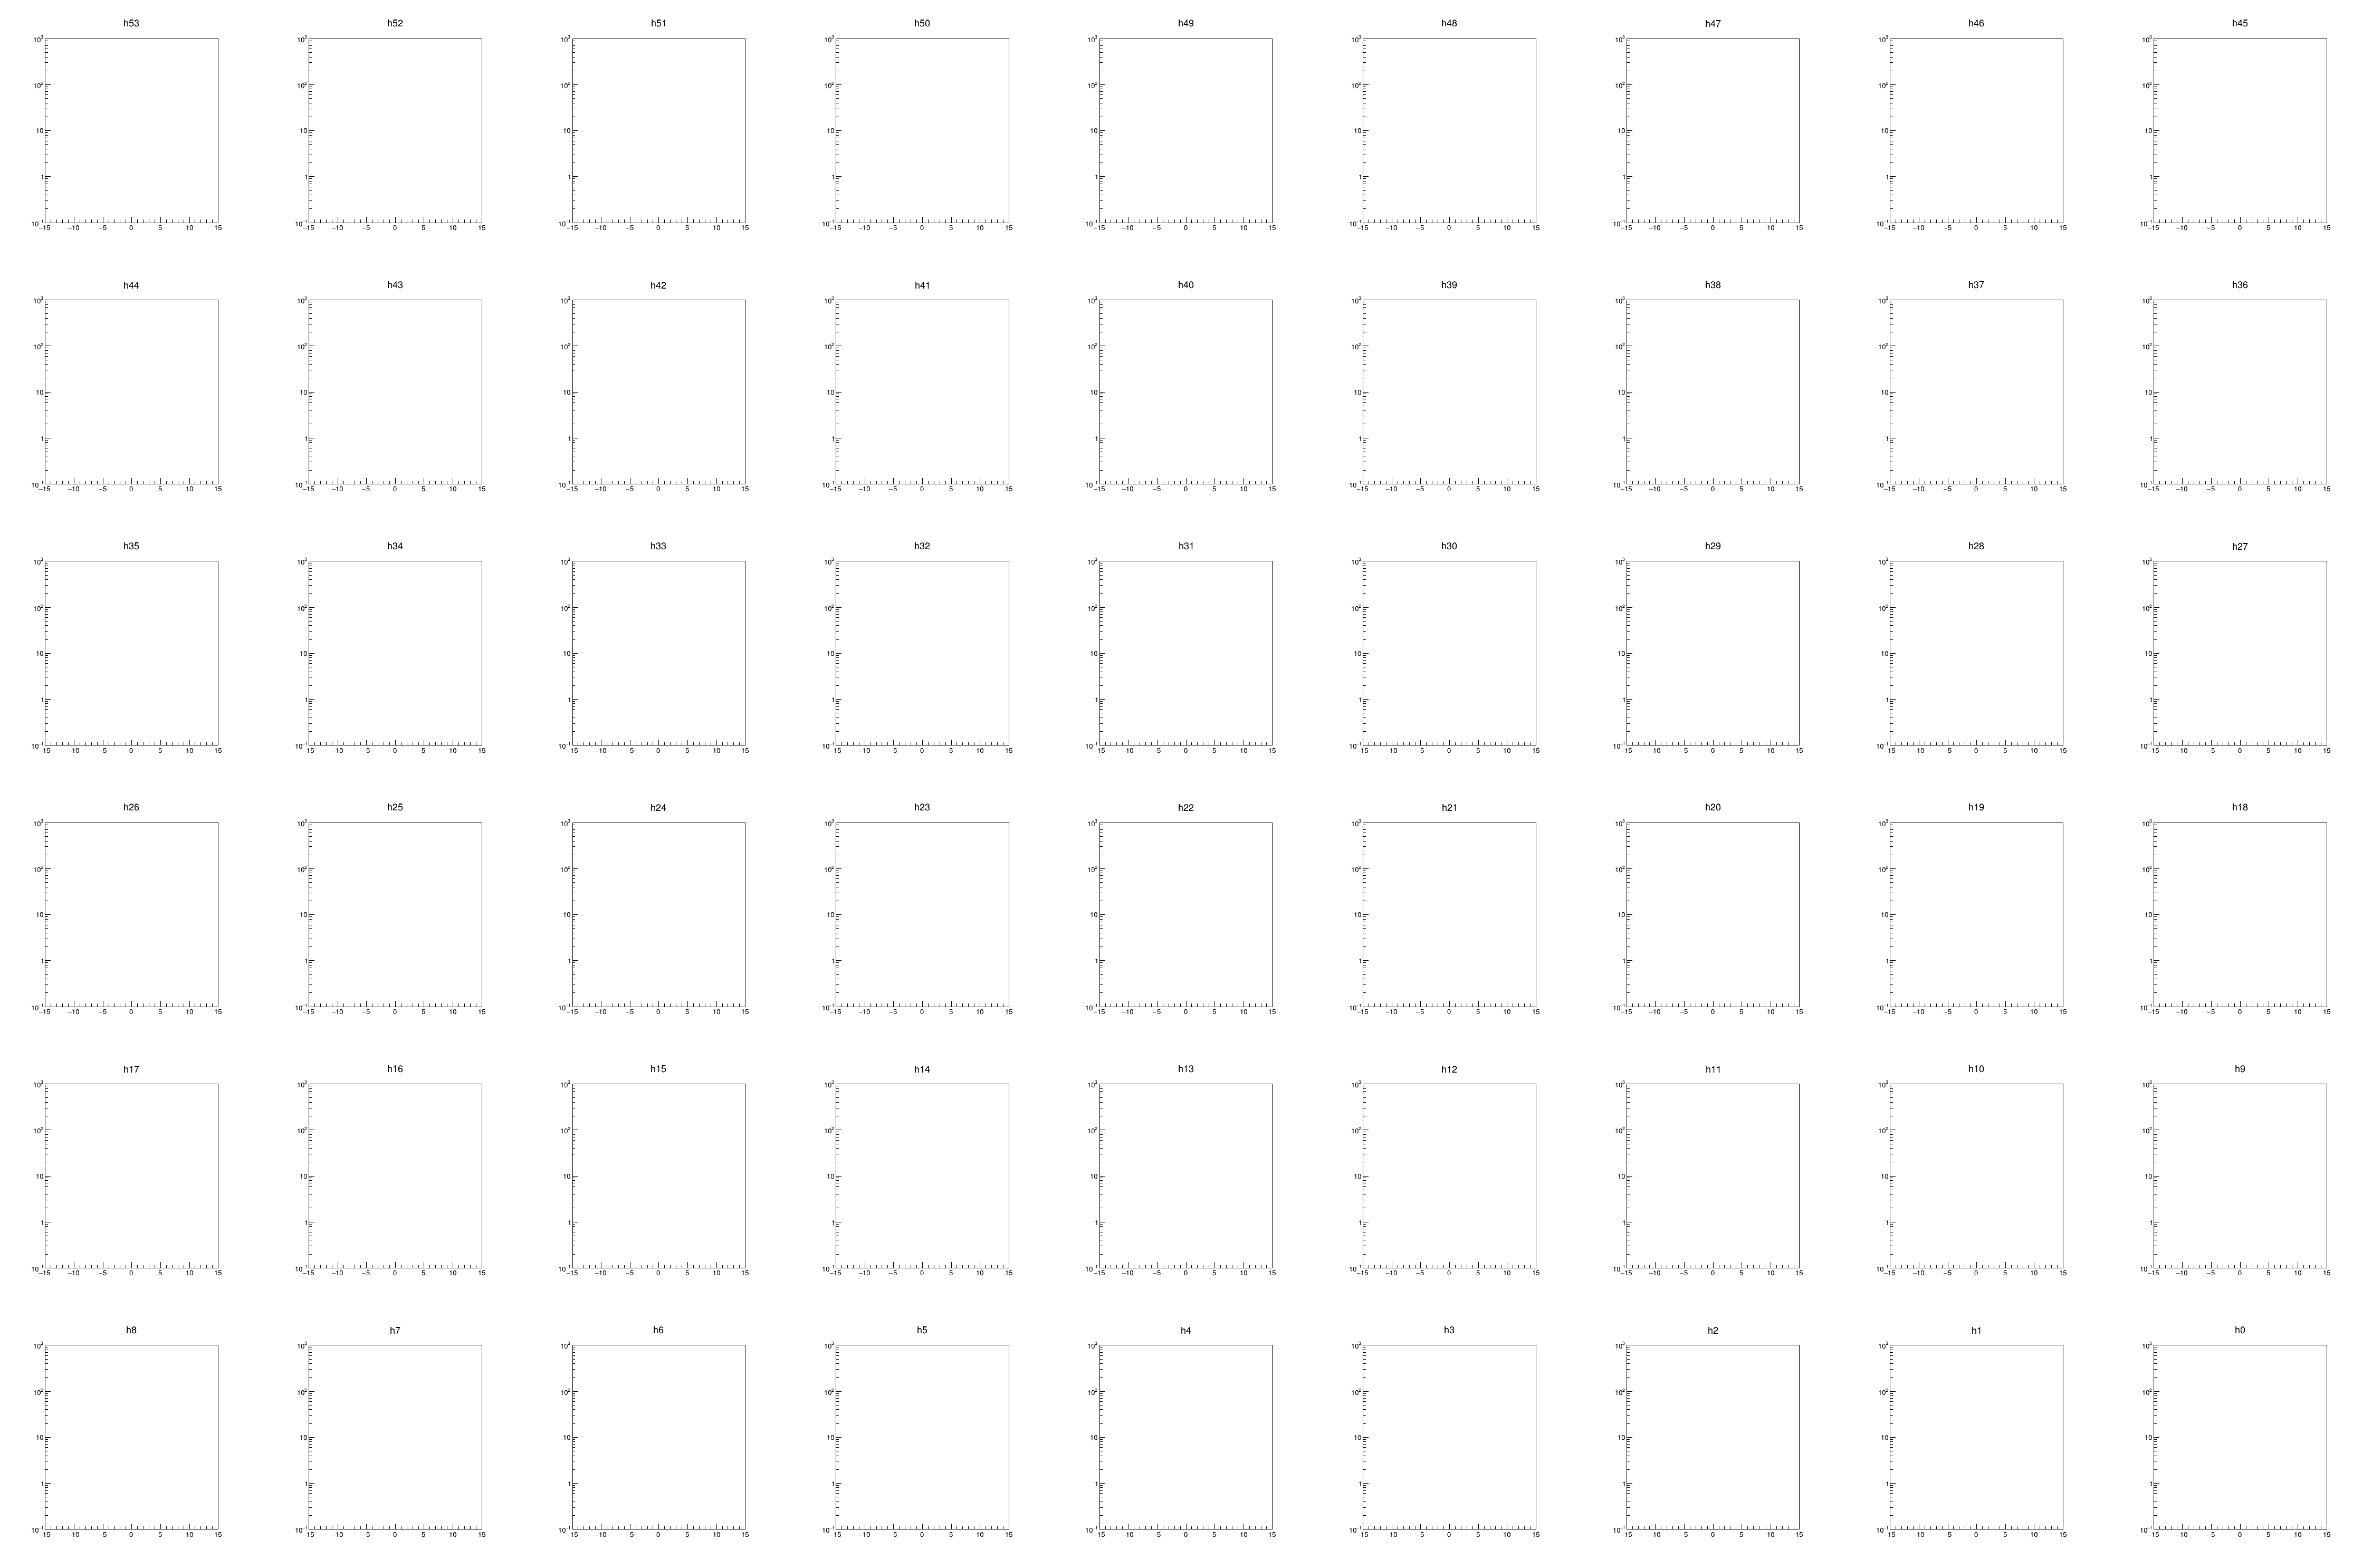

In [15]:
c = r.TCanvas("c","c",4500,3000)
c.Divide(9,6)

for i,hi in enumerate(crystalVec):
    c.cd(53 - i+1)
    r.gPad.SetLogy()
    hi.Draw()
    hi.GetYaxis().SetRangeUser(0.1,1000)
    
c.Draw()

---


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  2.72105e+07
NDf                       =        13757
Edm                       =  4.75366e-15
NCalls                    =           41
p0                        =            0                      	 (fixed)
p1                        =      1.50892   +/-   0.00214903  


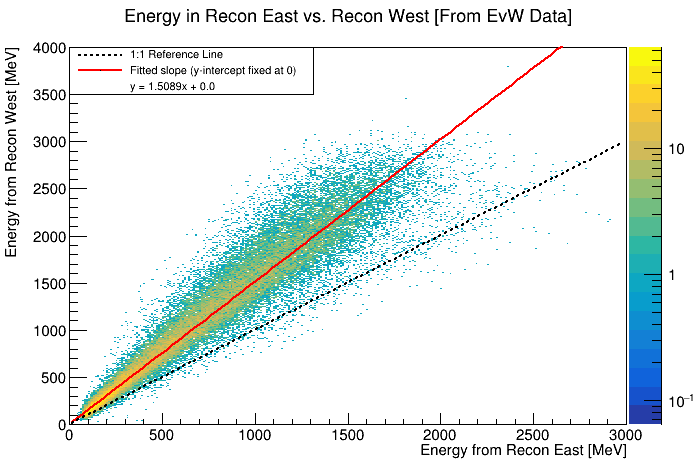

In [16]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.SetTitle("Energy in Recon East vs. Recon West [From EvW Data]")
evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
evwEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,3000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,3000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+
             "x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c3.SetLogz()
c3.Draw()

Lets see if this slope is an especially calorimeter dependent effect

Info in <TCanvas::SaveAs>: ROOT file ./c5.root has been created


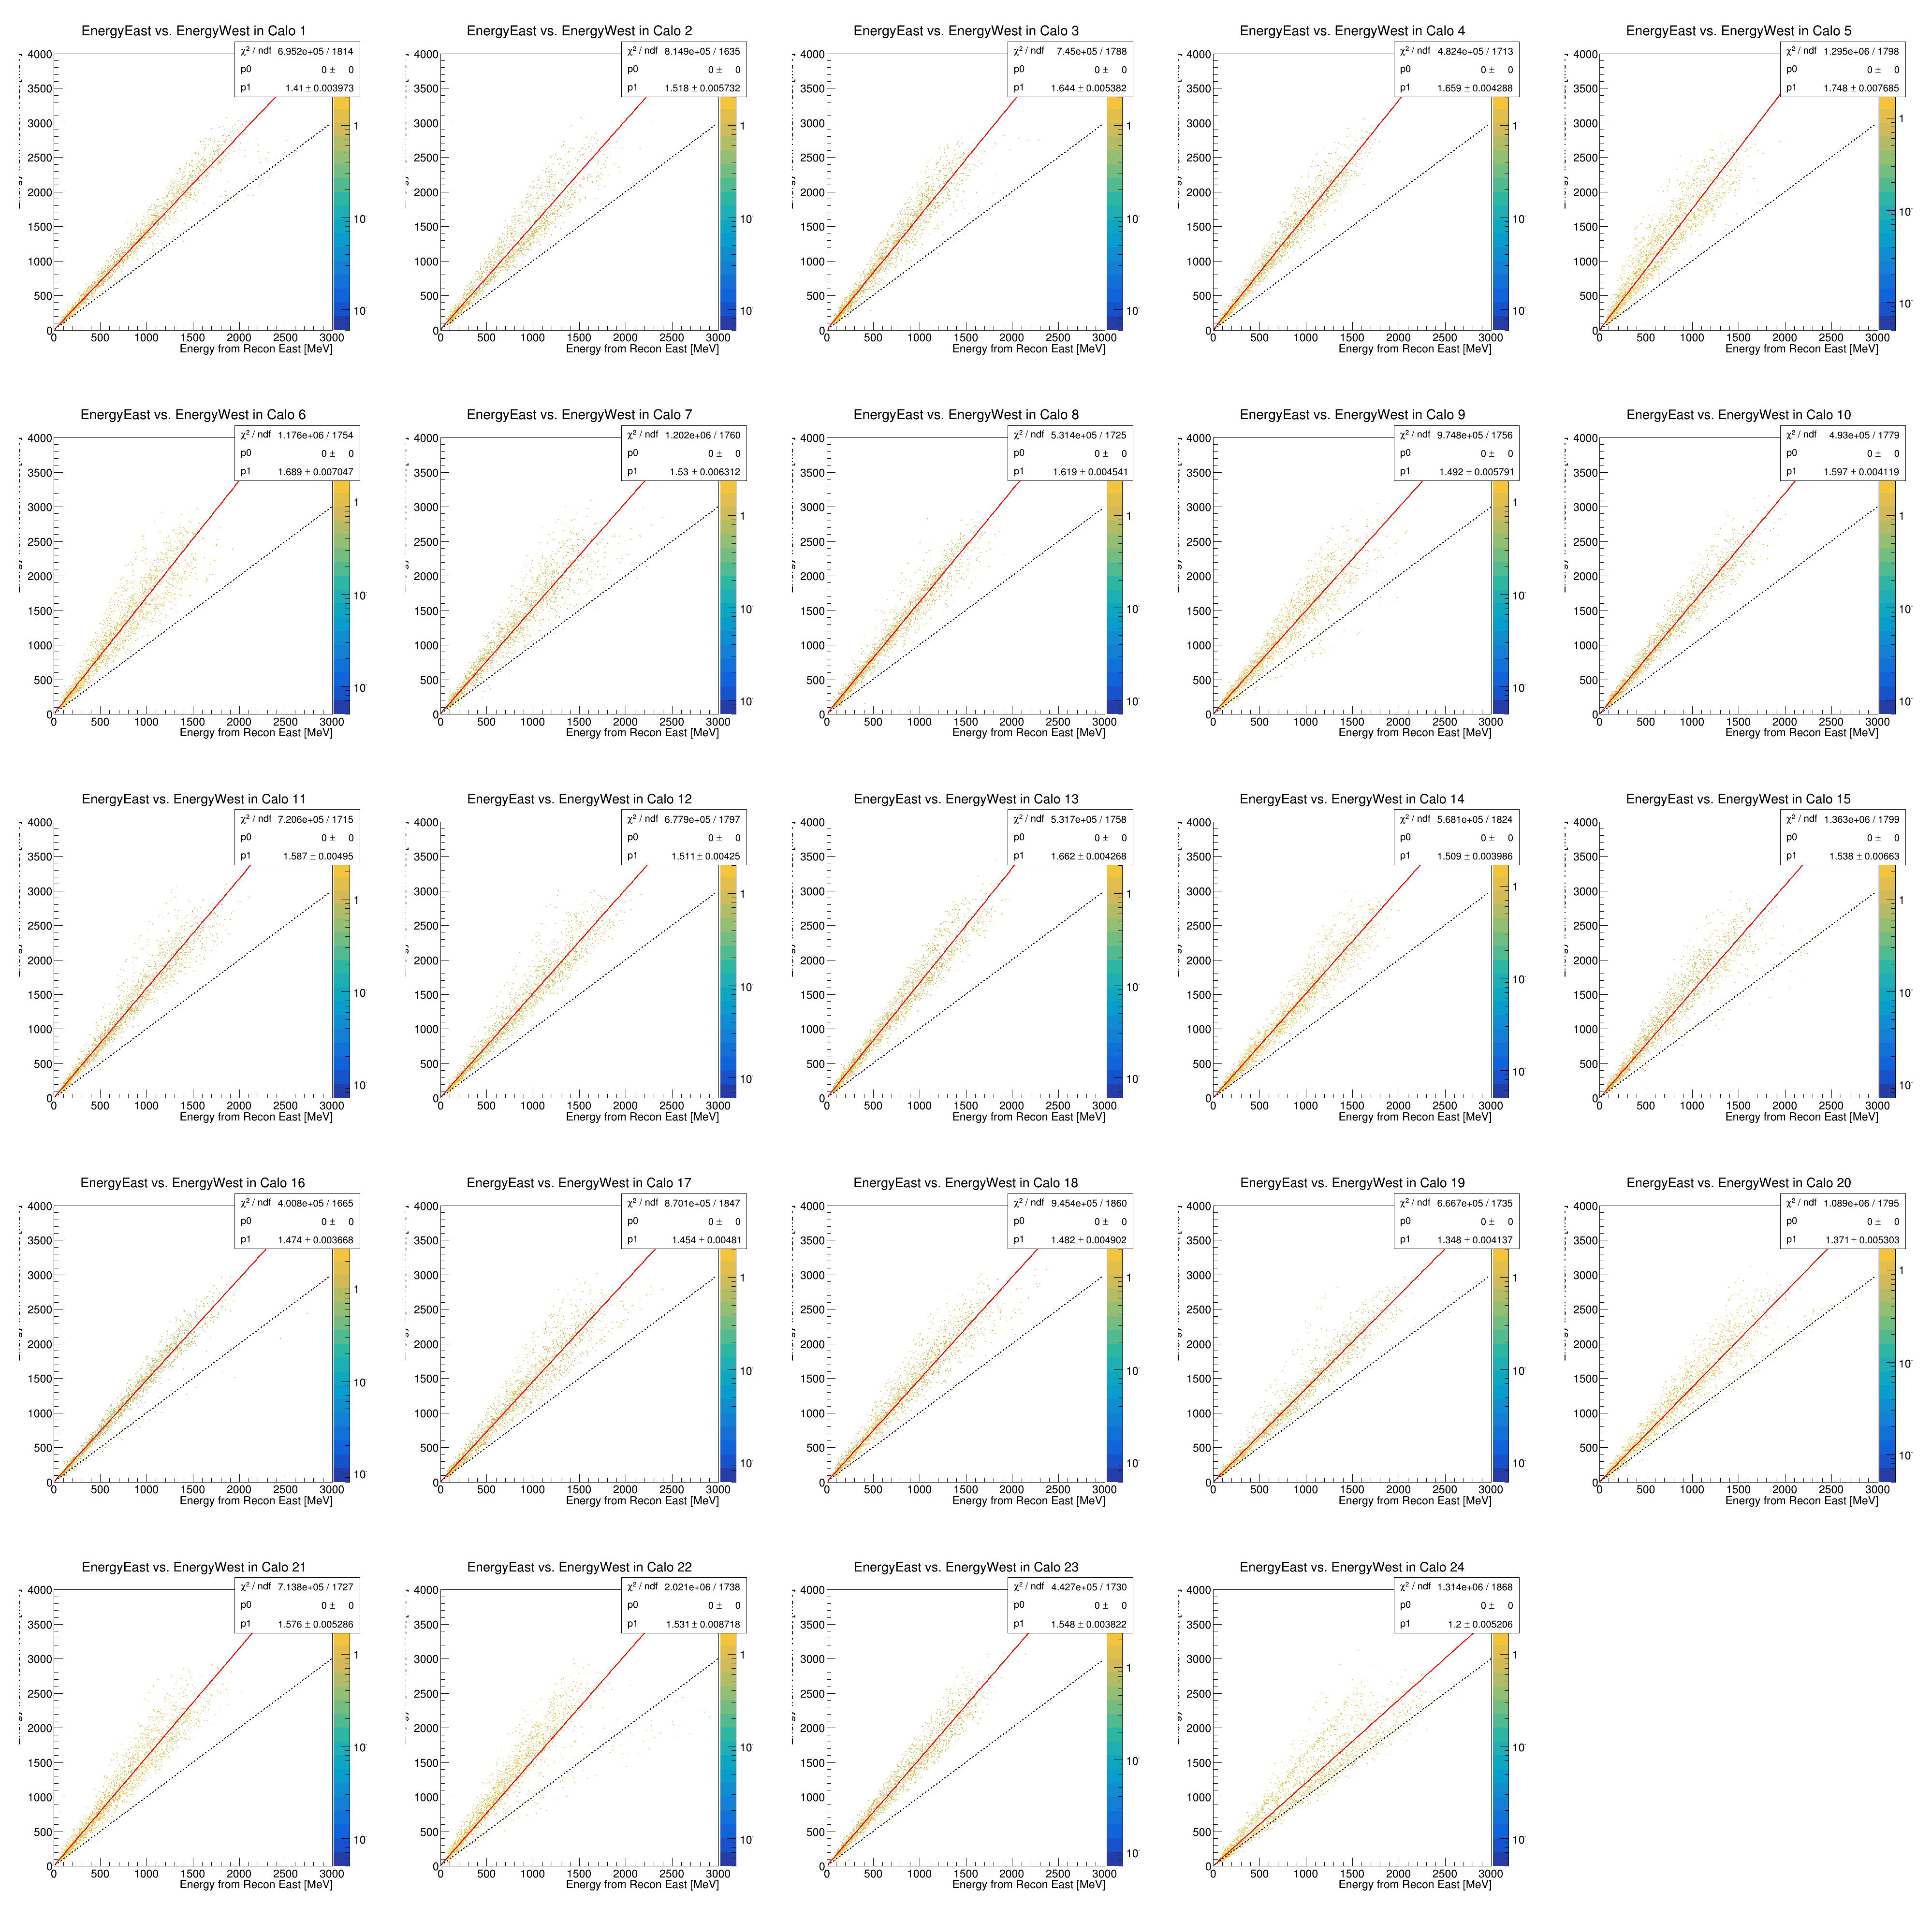

In [17]:
r.gStyle.SetOptFit(1)

evwEnergyEvWvec = []
for calo in range(1,25):
    evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone()
    evwEnergyEvWvec.append( evwEnergyEvW_i.Clone( "h"+str(calo) ) )
    
c5 = r.TCanvas("c5","c5",4000,4000)
c5.Divide(5,5)

actualslope_i = r.TF1("actualslope_i","pol1",0,3000)
actualslope_i.FixParameter(0,0)

slopeVec = []

for i, hist in enumerate(evwEnergyEvWvec):
    c5.cd(i+1)
    r.gPad.SetLogz()
    #hist.Rebin2D(5,5)
    hist.GetXaxis().SetRangeUser(0,3000)
    hist.GetYaxis().SetRangeUser(0,4000)
    
    hist.Fit("actualslope_i","REMBQ")
    hist.Draw("COLZ")
    onetoone.Draw("SAME")
    
    slopeVec.append(actualslope_i.GetParameter(1))
    
c5.Draw()
c5.Print("./c5.root")

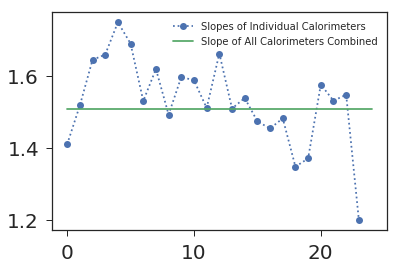

In [18]:
plt.plot(slopeVec,'o:',label='Slopes of Individual Calorimeters')
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined')
plt.legend()
plt.show()

---

We can also see if this slope changes significantly when we look at the WvE data instead

  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  2.70233e+07
NDf                       =        13736
Edm                       =  4.76683e-15
NCalls                    =           97
p0                        =            0                      	 (fixed)
p1                        =      1.50881   +/-   0.00214623  


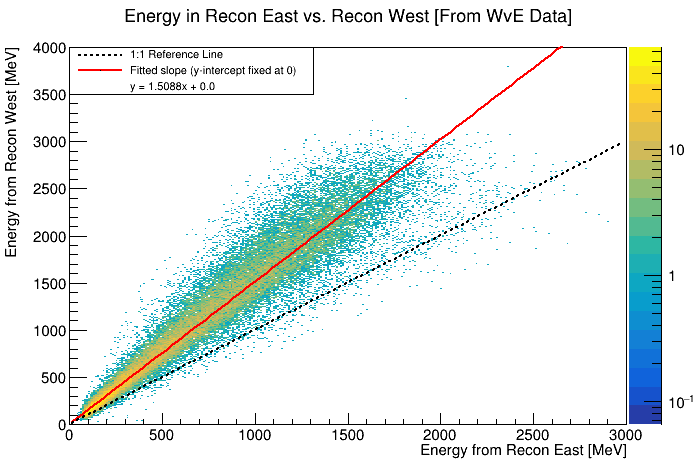

In [19]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
wveEnergyEvW = f.Get("farline").Get("wveEnergyEvW").Clone()
wveEnergyEvW.SetTitle("Energy in Recon East vs. Recon West [From WvE Data]")
wveEnergyEvW.GetXaxis().SetRangeUser(0,3000)
wveEnergyEvW.GetYaxis().SetRangeUser(0,4000)
wveEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,3000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,3000)
actualslope.FixParameter(0,0)
wveEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+
             "x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c3.SetLogz()
c3.Draw()

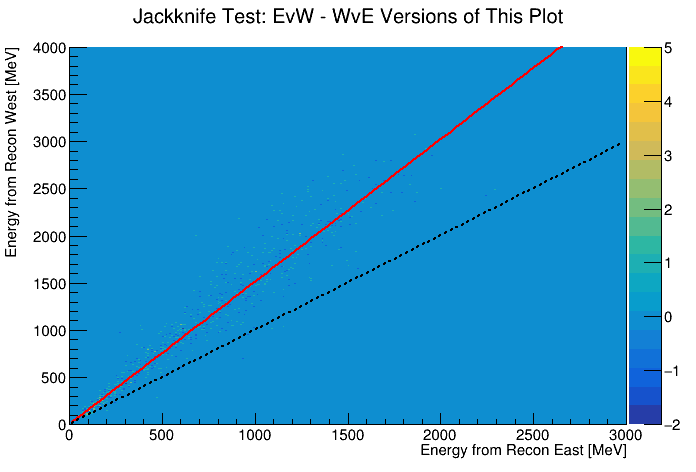

In [20]:
jackknife_EvW = evwEnergyEvW.Clone("jackknife_EvW")
jackknife_EvW.Add(wveEnergyEvW, -1)
jackknife_EvW.SetTitle("Jackknife Test: EvW - WvE Versions of This Plot")
c3 = r.TCanvas()
jackknife_EvW.Draw("COLZ")
onetoone.Draw("SAME")
#c3.SetLogz()
c3.Draw()

In [21]:
print(jackknife_EvW.GetEntries())

195.0


In [22]:
deltaTVec = []
for calo in range(1,25):
    evwDeltaTCaloAfterCorr = f.Get("farline").Get("evwDeltaTCaloAfterCorr").Clone()
    evwDeltaTCaloAfterCorr.GetYaxis().SetRangeUser(calo,calo+1)
    evwDeltaTCaloAfterCorr.Draw("COLZ")

    evwDeltaTAfterCorr = evwDeltaTCaloAfterCorr.ProjectionX().Clone()
    evwDeltaTAfterCorr.GetXaxis().SetRangeUser(-.6,.6)
    evwDeltaTAfterCorr.SetTitle("Calo "+str(calo))
    evwDeltaTAfterCorr.GetXaxis().SetTitle("$\\Delta t$ ~[c.t.]")
    evwDeltaTAfterCorr.Draw()

    deltaTVec.append( evwDeltaTAfterCorr.Clone("h"+str(calo)) )

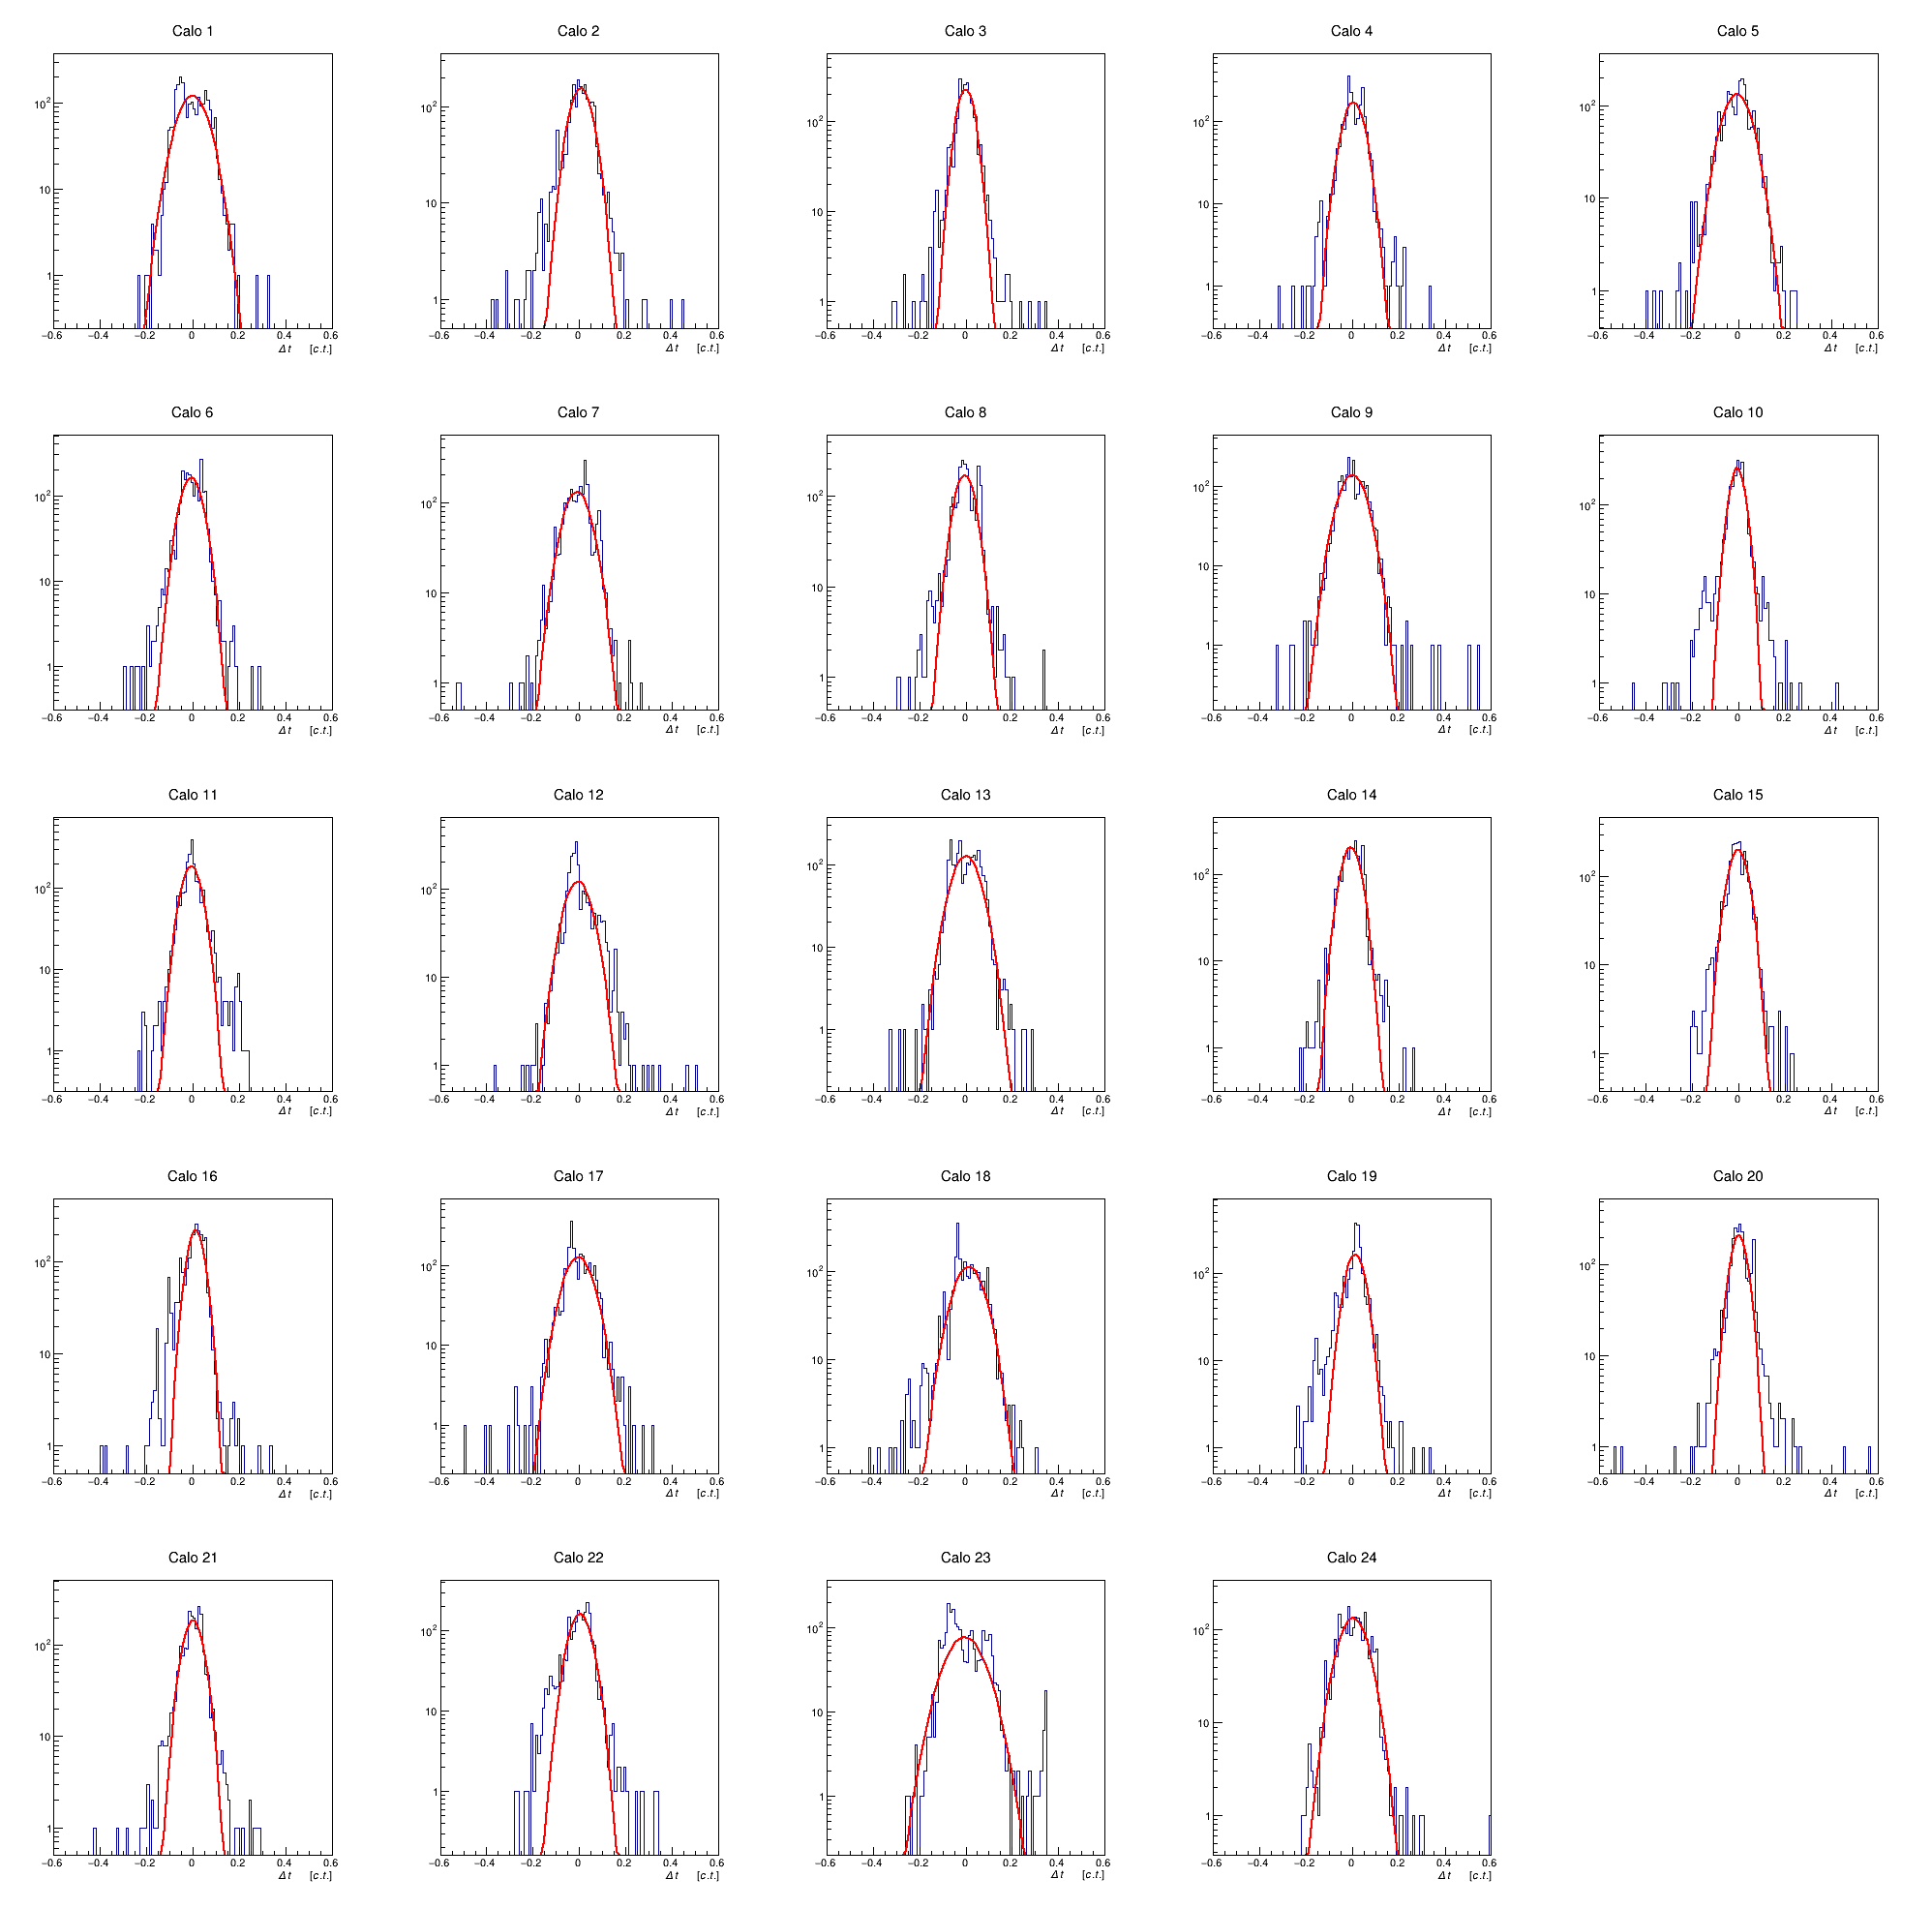

In [23]:
c3 = r.TCanvas("c3","c3",2000,2000)
c3.Divide(5,5)
for i in range(24):
    c3.cd(i+1)
    r.gPad.SetLogy()
    deltaTVec[i].Draw()
    deltaTVec[i].Fit("gaus","EBMQ")
c3.Draw()

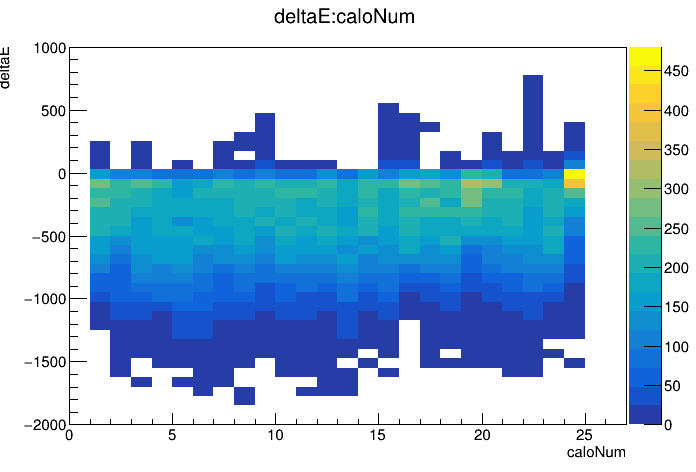

In [24]:
c = r.TCanvas()
tcomp.Draw("deltaE:caloNum","","colz")
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hcompX (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


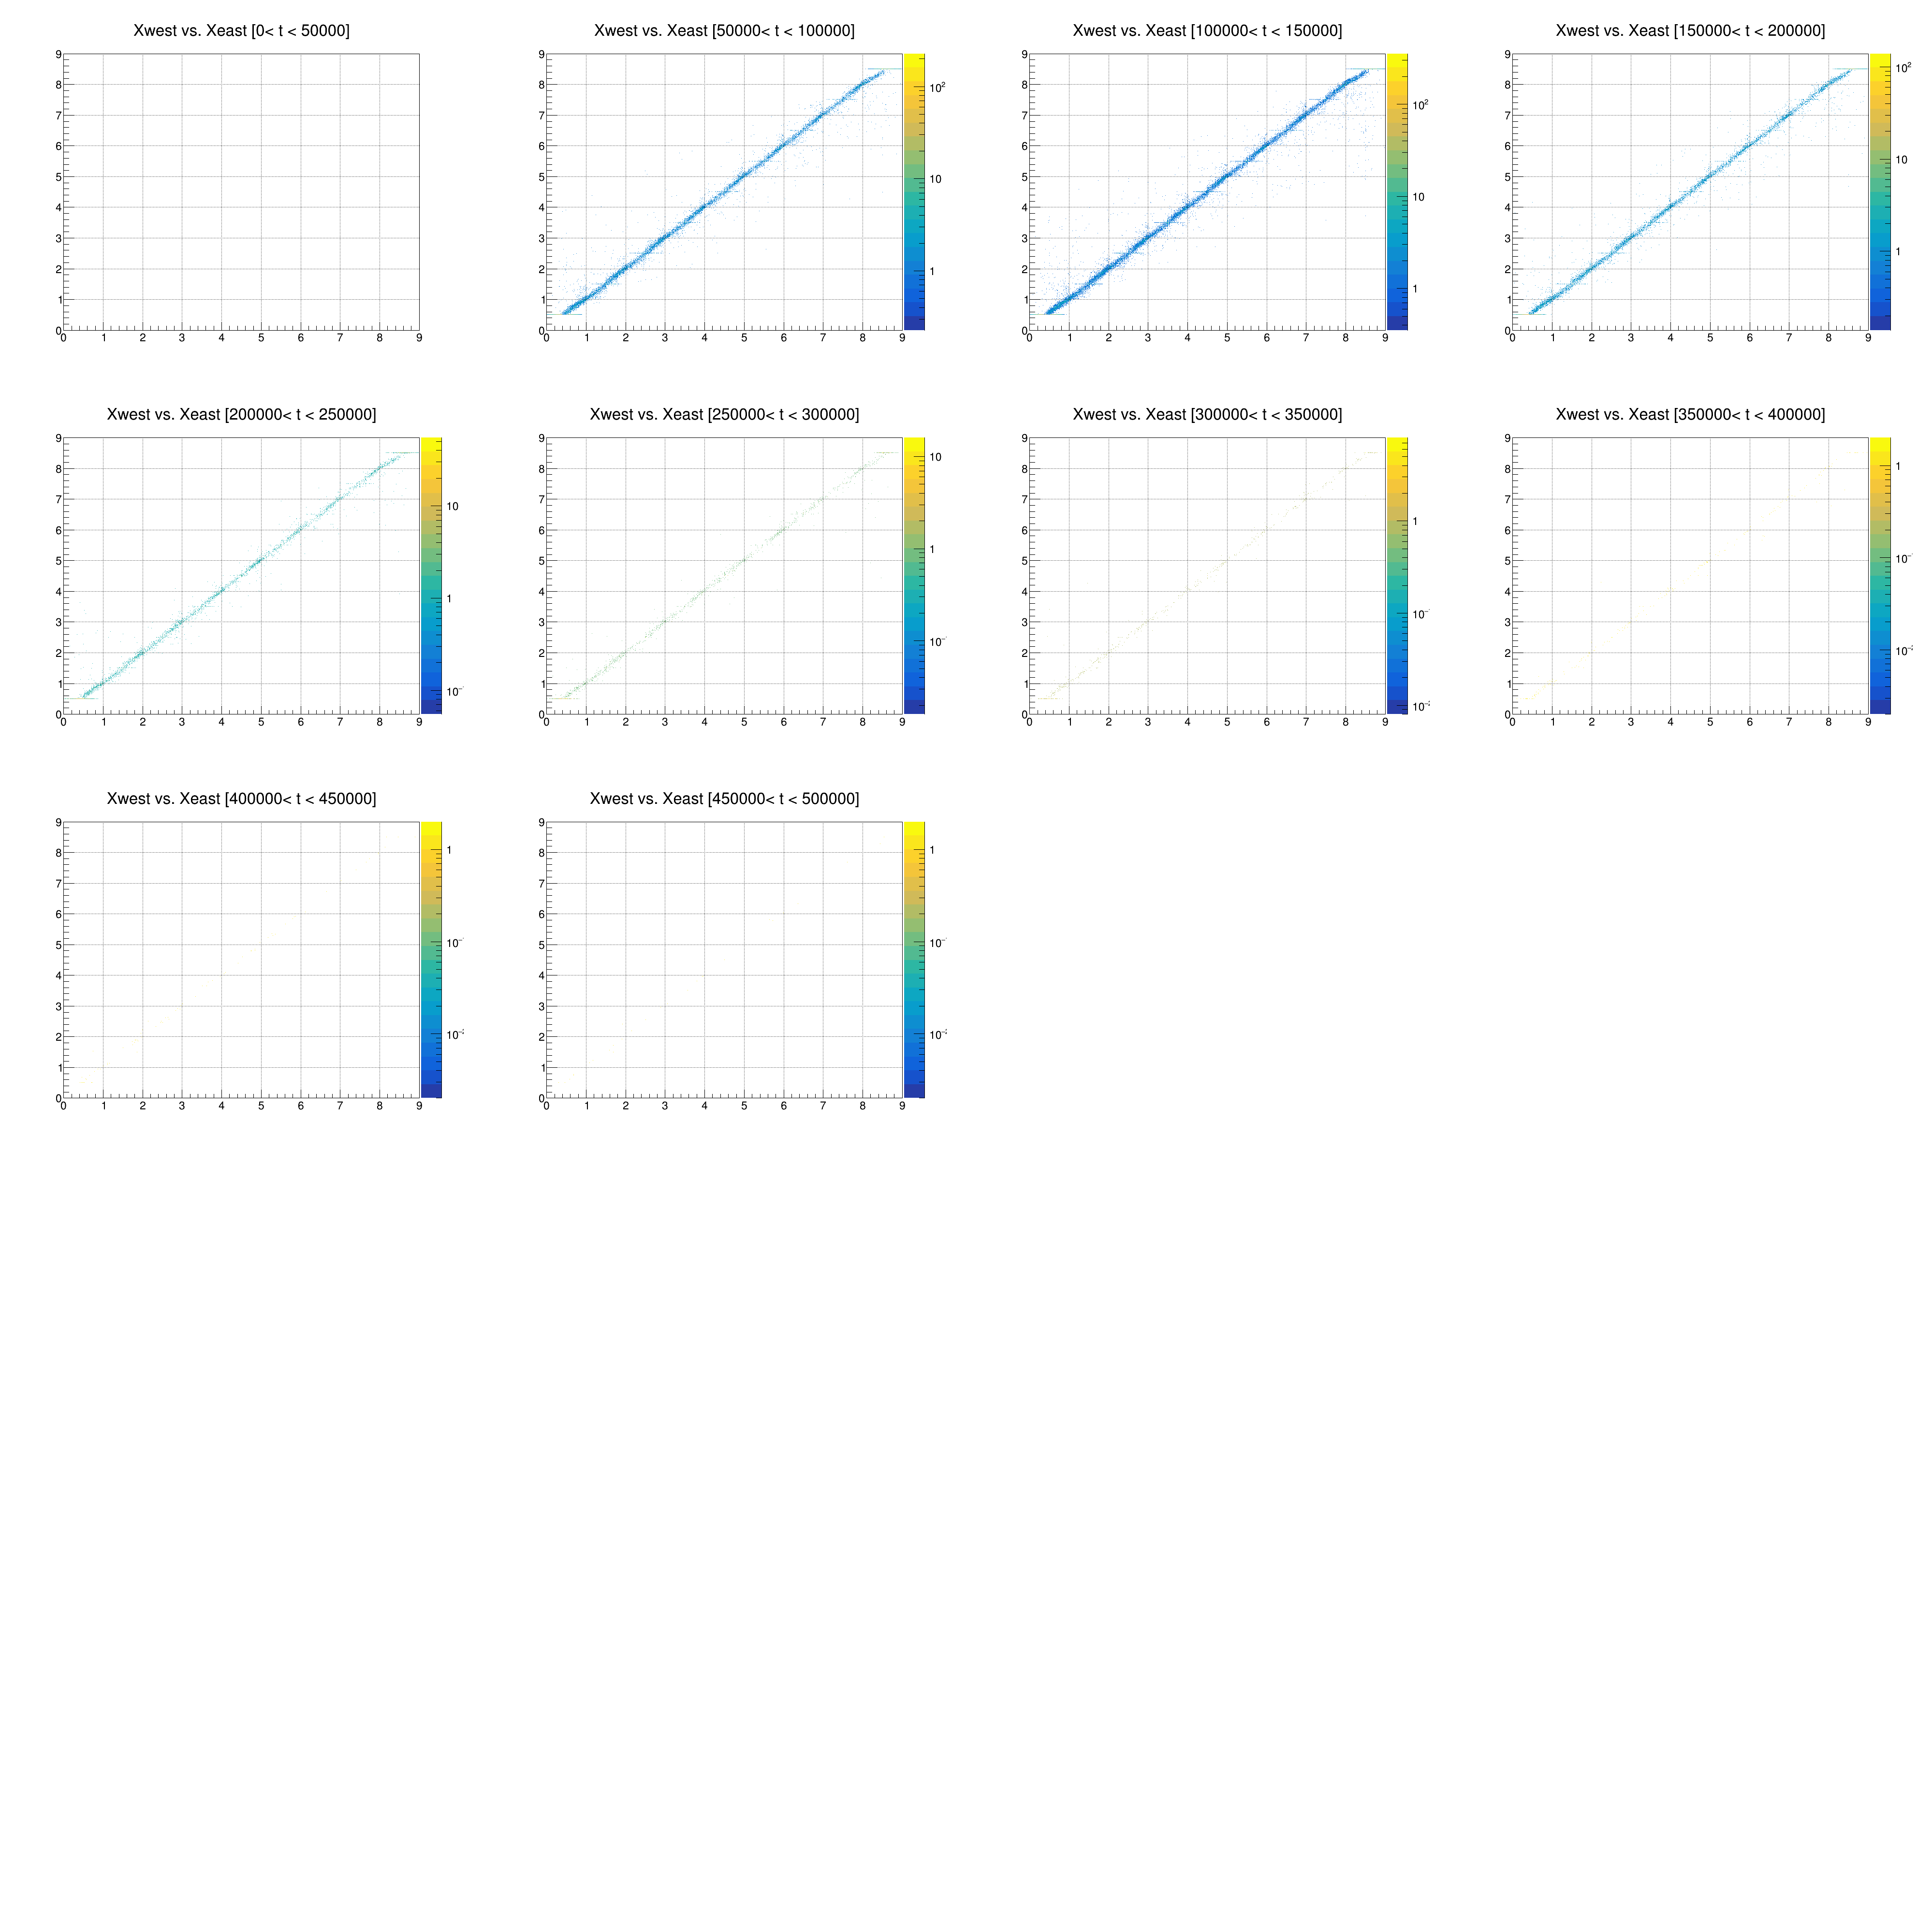

In [28]:
energycutVec = []

hcompX = r.TH2D("hcompX","Comparison of x-Positions in Recon East and West",900,0,9,900,0,9)

for timecut in range(0,500000,50000):
    hcompxy_ecut = hcompX.Clone("hcompxy_ecut")
    hcompxy_ecut.Reset()
    tcomp.Draw("positionWest.first:positionEast.first>>hcompxy_ecut",
               "timeEast > "+str(timecut)+" && timeEast < "+str(timecut+50000),"goff")
    hcompxy_ecut.Draw("colz")

    hcompxy_ecut.SetTitle("Xwest vs. Xeast ["+str(timecut)+"< t < "+str(timecut+50000)+"]")
    #hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
    #hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)
    #hcompxy_ecut.GetZaxis().SetRangeUser(1,10000)
               
    energycutVec.append( hcompxy_ecut.Clone(str(energycut)) )
               
               
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(4,5)
for i, hi in enumerate(energycutVec):
    c2.cd(i+1)
    r.gPad.SetLogz()
    r.gPad.SetGridx()
    r.gPad.SetGridy()
    hi.Draw("colz")
c2.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).


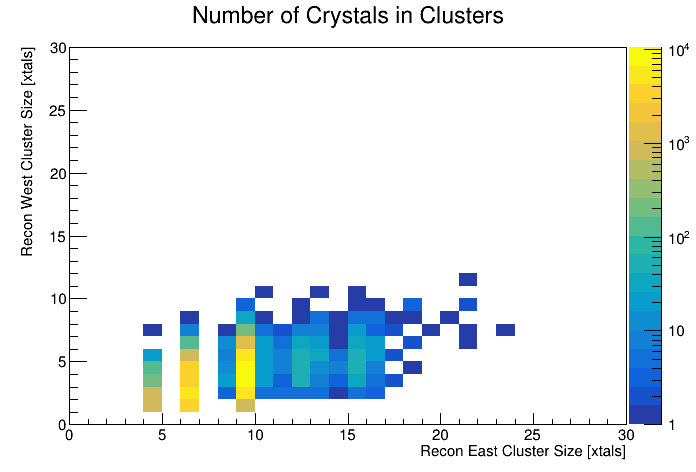

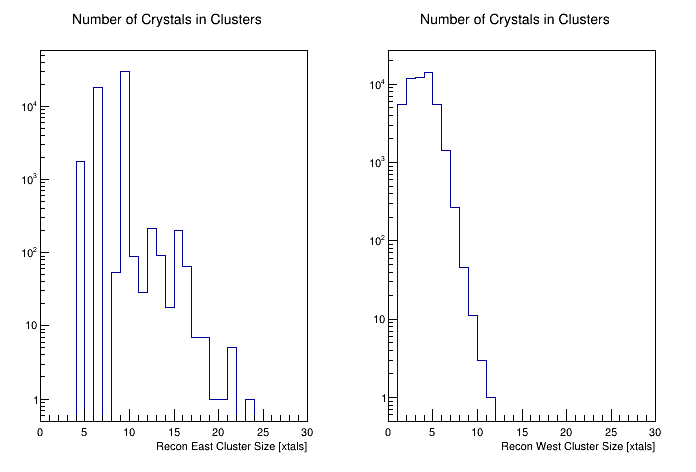

In [22]:
c = r.TCanvas()
h = r.TH2D("h","Number of Crystals in Clusters; Recon East Cluster Size [xtals]; Recon West Cluster Size [xtals]",54,0,54,54,0,54)
for entry in tcomp:
    if(entry.timeEast < 30*1000/1.25):
        continue
    sizeEast = len(entry.crystalsEast)
    sizeWest = len(entry.crystalsWest)
    h.Fill(sizeEast,sizeWest)
h.Draw("COLZ")
h.GetXaxis().SetRangeUser(0,30)
h.GetYaxis().SetRangeUser(0,30)
c.SetLogz()
c.Draw()

c2 = r.TCanvas()
c2.Divide(2)
c2.cd(1)
r.gPad.SetLogy()
h.ProjectionX().Draw()
c2.cd(2)
r.gPad.SetLogy()
h.ProjectionY().Draw()
c2.Draw()